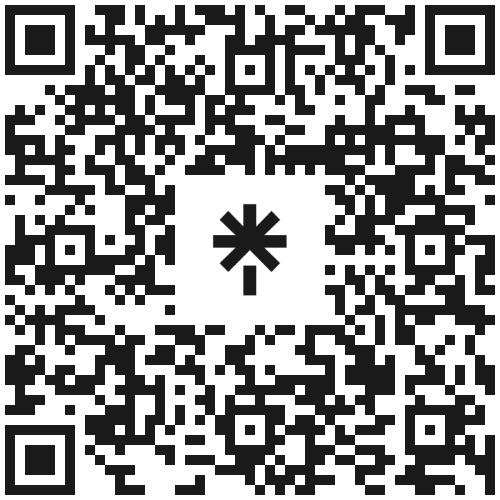

https://tinyurl.com/dsfdn8

*Data is the new oil. But it doesn't take a rocket scientist to understand it, just a data scientist. Data Science is not as daunting as it seems when you break down everything into simple terms.* - Quinn Grace

# Table of Contents
* [What Is Data Science?](#what)
* [The Case For Learning Data Science](#learn)
* [Overview of the Data Science Lifecycle](#lifecycle)
1. [Problem Definition](#problem)
2. [Data Collection](#collection)
3. [Data Cleaning](#clean)
4. [Exploratory Data Analysis](#eda)
5. [Feature Engineering](#feat)
6. [Machine Learning](#ml)
7. [Model Evaluation](#eval)
8. [Deployment](#deploy)
* [How You Can Start Picking Up Data Science Tools Now](#tools)

# What Is Data Science? <a class="anchor"  id="what"></a>

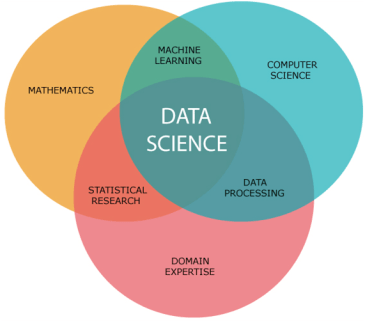

According to IBM: Data science combines math and statistics, specialized programming, advanced analytics, artificial intelligence (AI) and machine learning with specific subject matter expertise to uncover actionable insights hidden in an organization’s data.

But because this is Data Science for Dummies, I asked ChatGPT to explain Data Science to a 5 year old and here was the response: imagine you have a big box of different colored candies. Now, you want to know which candy is the yummiest or which color is the most popular. Data science is like being a detective for candies. You use special tools and tricks to look closely at all the candies, counting them, sorting them by color, and even tasting them (if you're allowed)! Then, you can figure out which ones are the tastiest or which color is the favorite. So, data science helps us understand and make sense of lots of information, just like figuring out which candies are the best in the box!

# The Case For Learning Data Science <a class="anchor"  id="learn"></a>

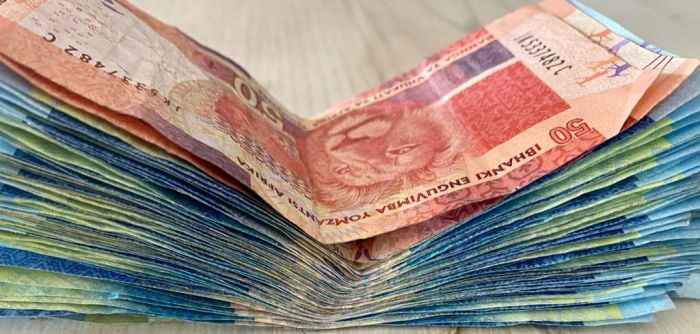

You can make a lot of money.
According to PayScale, the average salary for a Data Scientist in South Africa is R460,031 in 2024 and in the US is $100,238 in 2024.

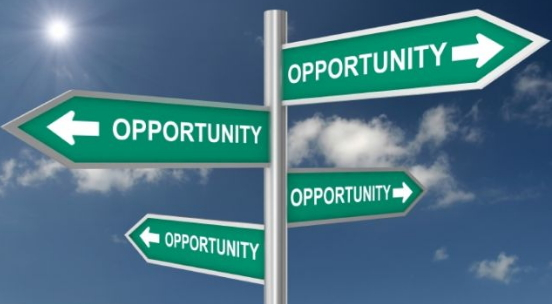

Different job opportunities:
- Data Scientist
- Data Analyst
- Data Engineer
- Data Architect
- Business Intelligence Analyst
- Database Administrator
- Machine Learning Engineer

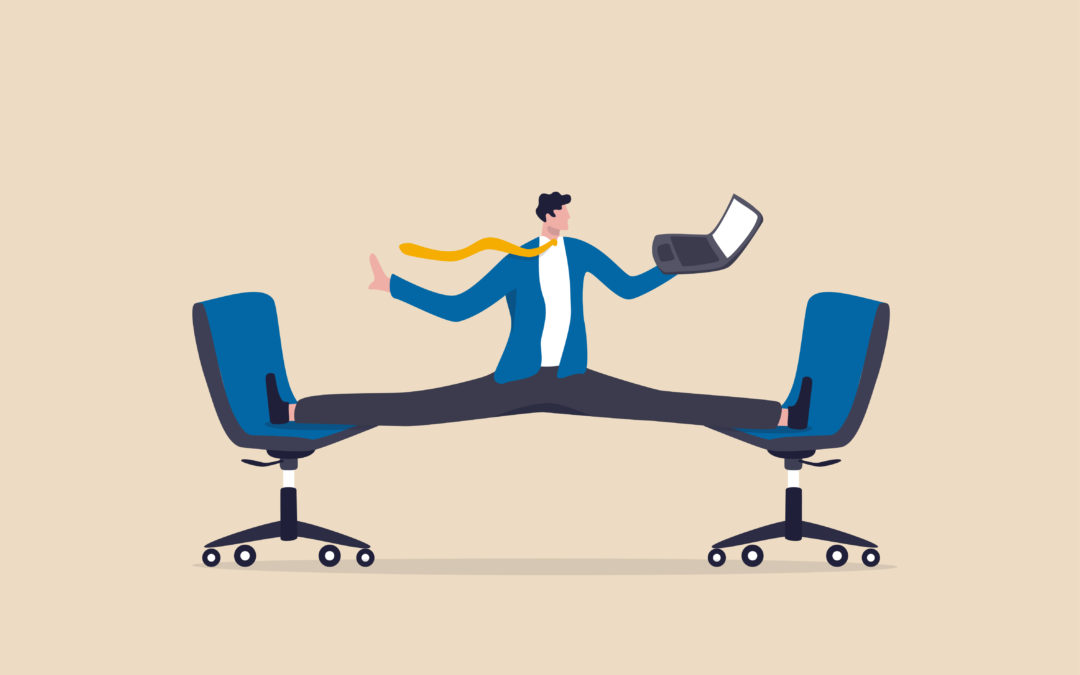

Flexibility:
Can work in just about any industry. Most popular industries are:
- Healthcare
- Financial Industry
- Manufacturing
- Logistics
- Retail Industry
- Telecommunications
- Automotive Industry

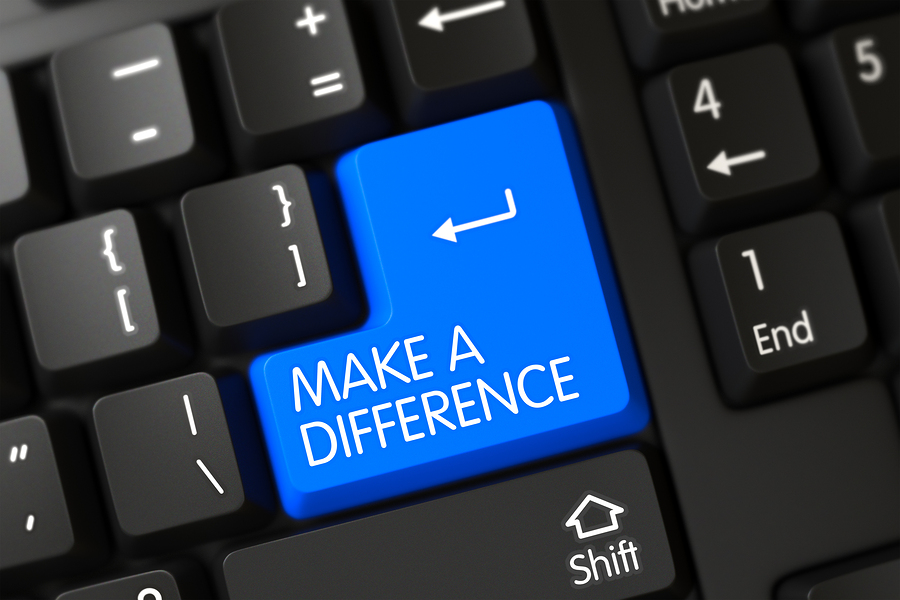

You can feel like you are making a difference. Your work will inform company decisions. You can also work in industries that help people, for example, I am currently working on analytics that will help decide where to place clinics in Rwanda.

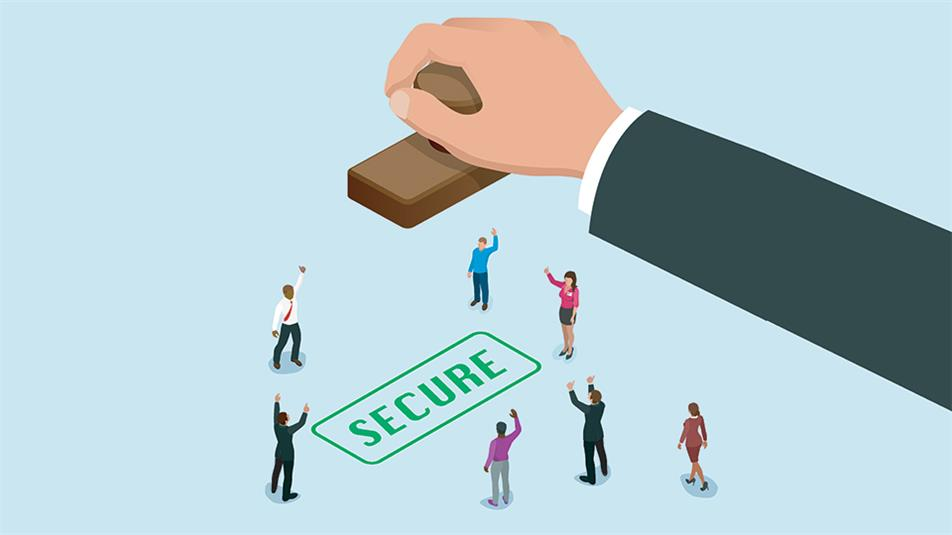

Job security: Data Scientists are in high demand and the demand keeps rising due to the rising amount of data being generated. More on [big data](https://www.youtube.com/watch?v=bAyrObl7TYE).

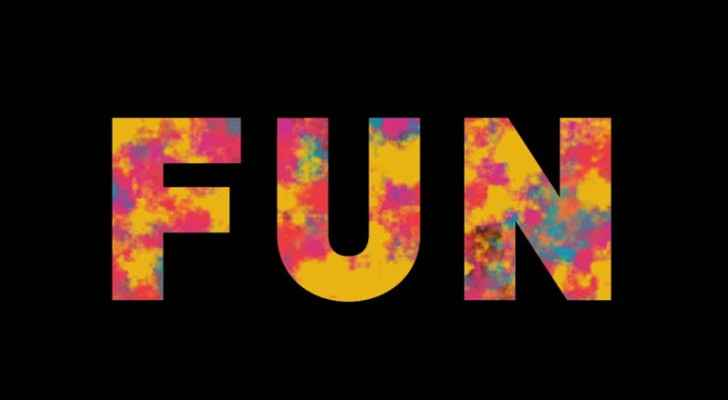

Okay this is kind of subjective, but you get to make pretty graphs and build AI. How is that not uber fun? I legit do that in my spare time.

# Overview of the Data Science Lifecycle <a class="anchor"  id="lifecycle"></a>

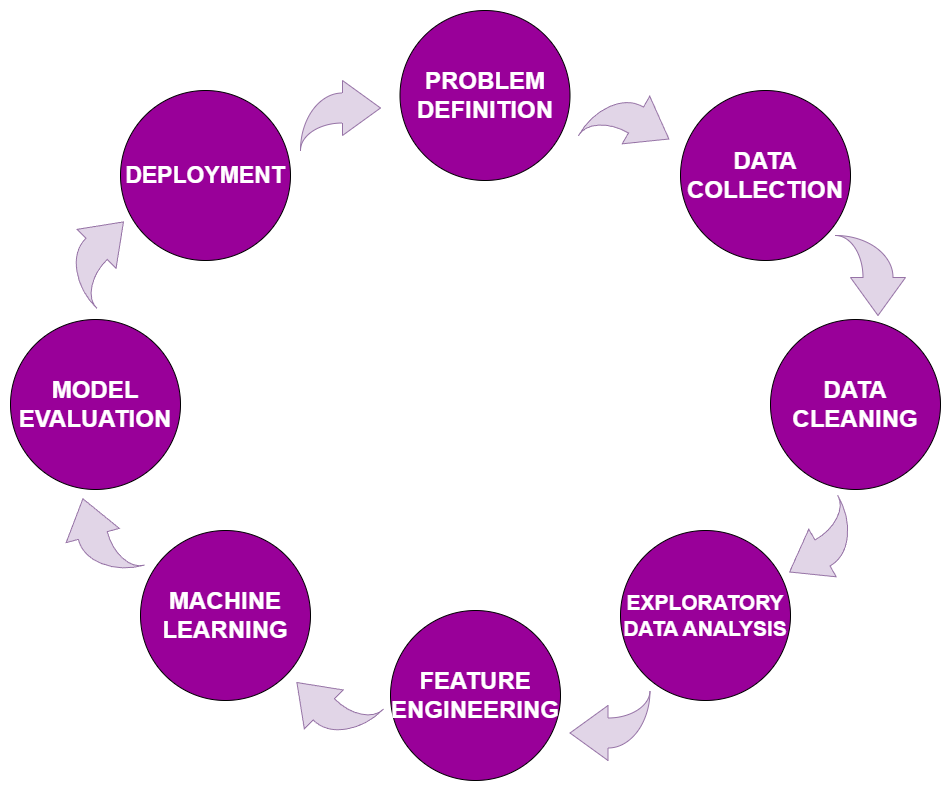

# 1. Problem Definition <a class="anchor"  id="problem"></a>
## AKA What The Boss Wants

This is where you figure out what exactly the problem is. Who does it affect? How does it affect them? What are you expected to do to solve it and what is not realistic to solve?

In our case, a government municipality noticed a 10 percent drop in average Mathematics scores and a 12 percent drop in the number of students passing Mathematics in nearby schools. They want to investigate the reasons driving the low scores as well as build an app that can detect students at risk of failing so that those students can be supported with help.

# 2. Data Collection <a class="anchor"  id="collection"></a>
## AKA The Part That Actually Makes Or Breaks The Project

You know the saying 'garbage in, garbage out'? Nowhere is that more true than in Data Science. So we need to find good data. 

In many jobs, you won't do this step. It is the Data Engineer's job to source the data, but companies often don't hire separate Data Engineers and you may end up having to do this. Or if you want to build an AI model for a certain purpose, you may need to collect the data.

The process is as follows:

Decide what data to gather - Who will the data be about, where will the data come from, and how much data do we need?

Decide how long to gather the data for

Decide how to collect the data - Will you collect the data yourself or find a suitable dataset?

Gather data


Here we have decided to use a dataset about the munipality's students and how they perform at Mathematics as well as other possibly important data points.

More info about data collection can be found [here](https://www.simplilearn.com/what-is-data-collection-article)

More info about web scraping can be found [here](https://realpython.com/python-web-scraping-practical-introduction/)

# 3. Data Cleaning <a class="anchor"  id="clean"></a>
## AKA Weeding and Tending the Garden

This is where the real fun begins, because we get to get our hands dirty with some code.

First let's import the relevant python libraries and create our dataframe (a way to store data).

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.pipeline import Pipeline # Make a pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder # Preprocess data
from sklearn.compose import ColumnTransformer # For pipeline making

import matplotlib.pyplot as plt # Data visualisation
# Helps matplotlib show properly
%matplotlib inline 
import seaborn as sns # Data visualisation

import pickle # Storing everything for deployment

from sklearn.linear_model import LinearRegression # The model
from sklearn.model_selection import train_test_split # Data preprocessing
from sklearn.metrics import mean_squared_error # Evaluating the model

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-data-set/student/student-mat.csv
/kaggle/input/student-performance-data-set/student/student-por.csv
/kaggle/input/student-performance-data-set/student/student.txt


In [2]:
# Loading the data into a dataframe (df)
df = pd.read_csv("/kaggle/input/student-performance-data-set/student/student-mat.csv", sep=";")

Data cleaning is kind of like cleaning your room, you want to get rid of all the junk and make the room look tidy. For data, this means fixing or removing:
- Duplicates
- Missing data
- Incorrectly formatted data
- Incorrect data 

In [3]:
# To know what needs cleaning, let's take a peak at the data
df.head() # Shows the first 5 entries of the dataframe

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [4]:
# Checking for missing/null values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

As we can see, there are no missing values. If there were, [this](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/) is how to handle them

For the next step, we need to only have numbers, not words to be able to analyse it properly. So we change the data type of any columns that have words and store it as corr_df.

In [5]:
def encode(df): # Create a function
    
    le = LabelEncoder() # Use the label encoder (converts words to numbers)
    corr_df = df.copy()
    categorical_columns = []
    for column in corr_df:
        if corr_df[column].dtype == object: #check if column is object dtype aka has words
            corr_df[column] = le.fit_transform(corr_df[column]) # Change object columns to number columns
        else:
            pass
    
    return corr_df

In [6]:
corr_df = encode(df) # Use the function

# 4. Exploratory Data Analysis <a class="anchor"  id="eda"></a> 
## AKA What You Spend All Your Time On
This is where you make pretty graphs to show what is happening in the data, you explore and analyse the data. This is made up of three steps:
1. Ask questions about the data
2. Graph the related variables to explore those questions
3. Answer those questions or make some sort of conclusion - this is 'analysis'

Three questions you will normally always ask are about outliers, the 'spread' of the data, and correlation.

In [7]:
# Getting a list of all the variables/columns and their datatype
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

The questions I came up with for this data:
- Are there any outliers?
- What is the spread of the data?
- Is there a relationship between health status, absences, failures, and the final grade a student receives?
- How do males and females differ in their maths marks?
- Does the student's school affect their mark?
- Are students at one school wealthier than another?
- How are factors correlated?

Let's visualise and analyse them.



## Are there any outliers?

Text(0.5, 1.0, 'G3')

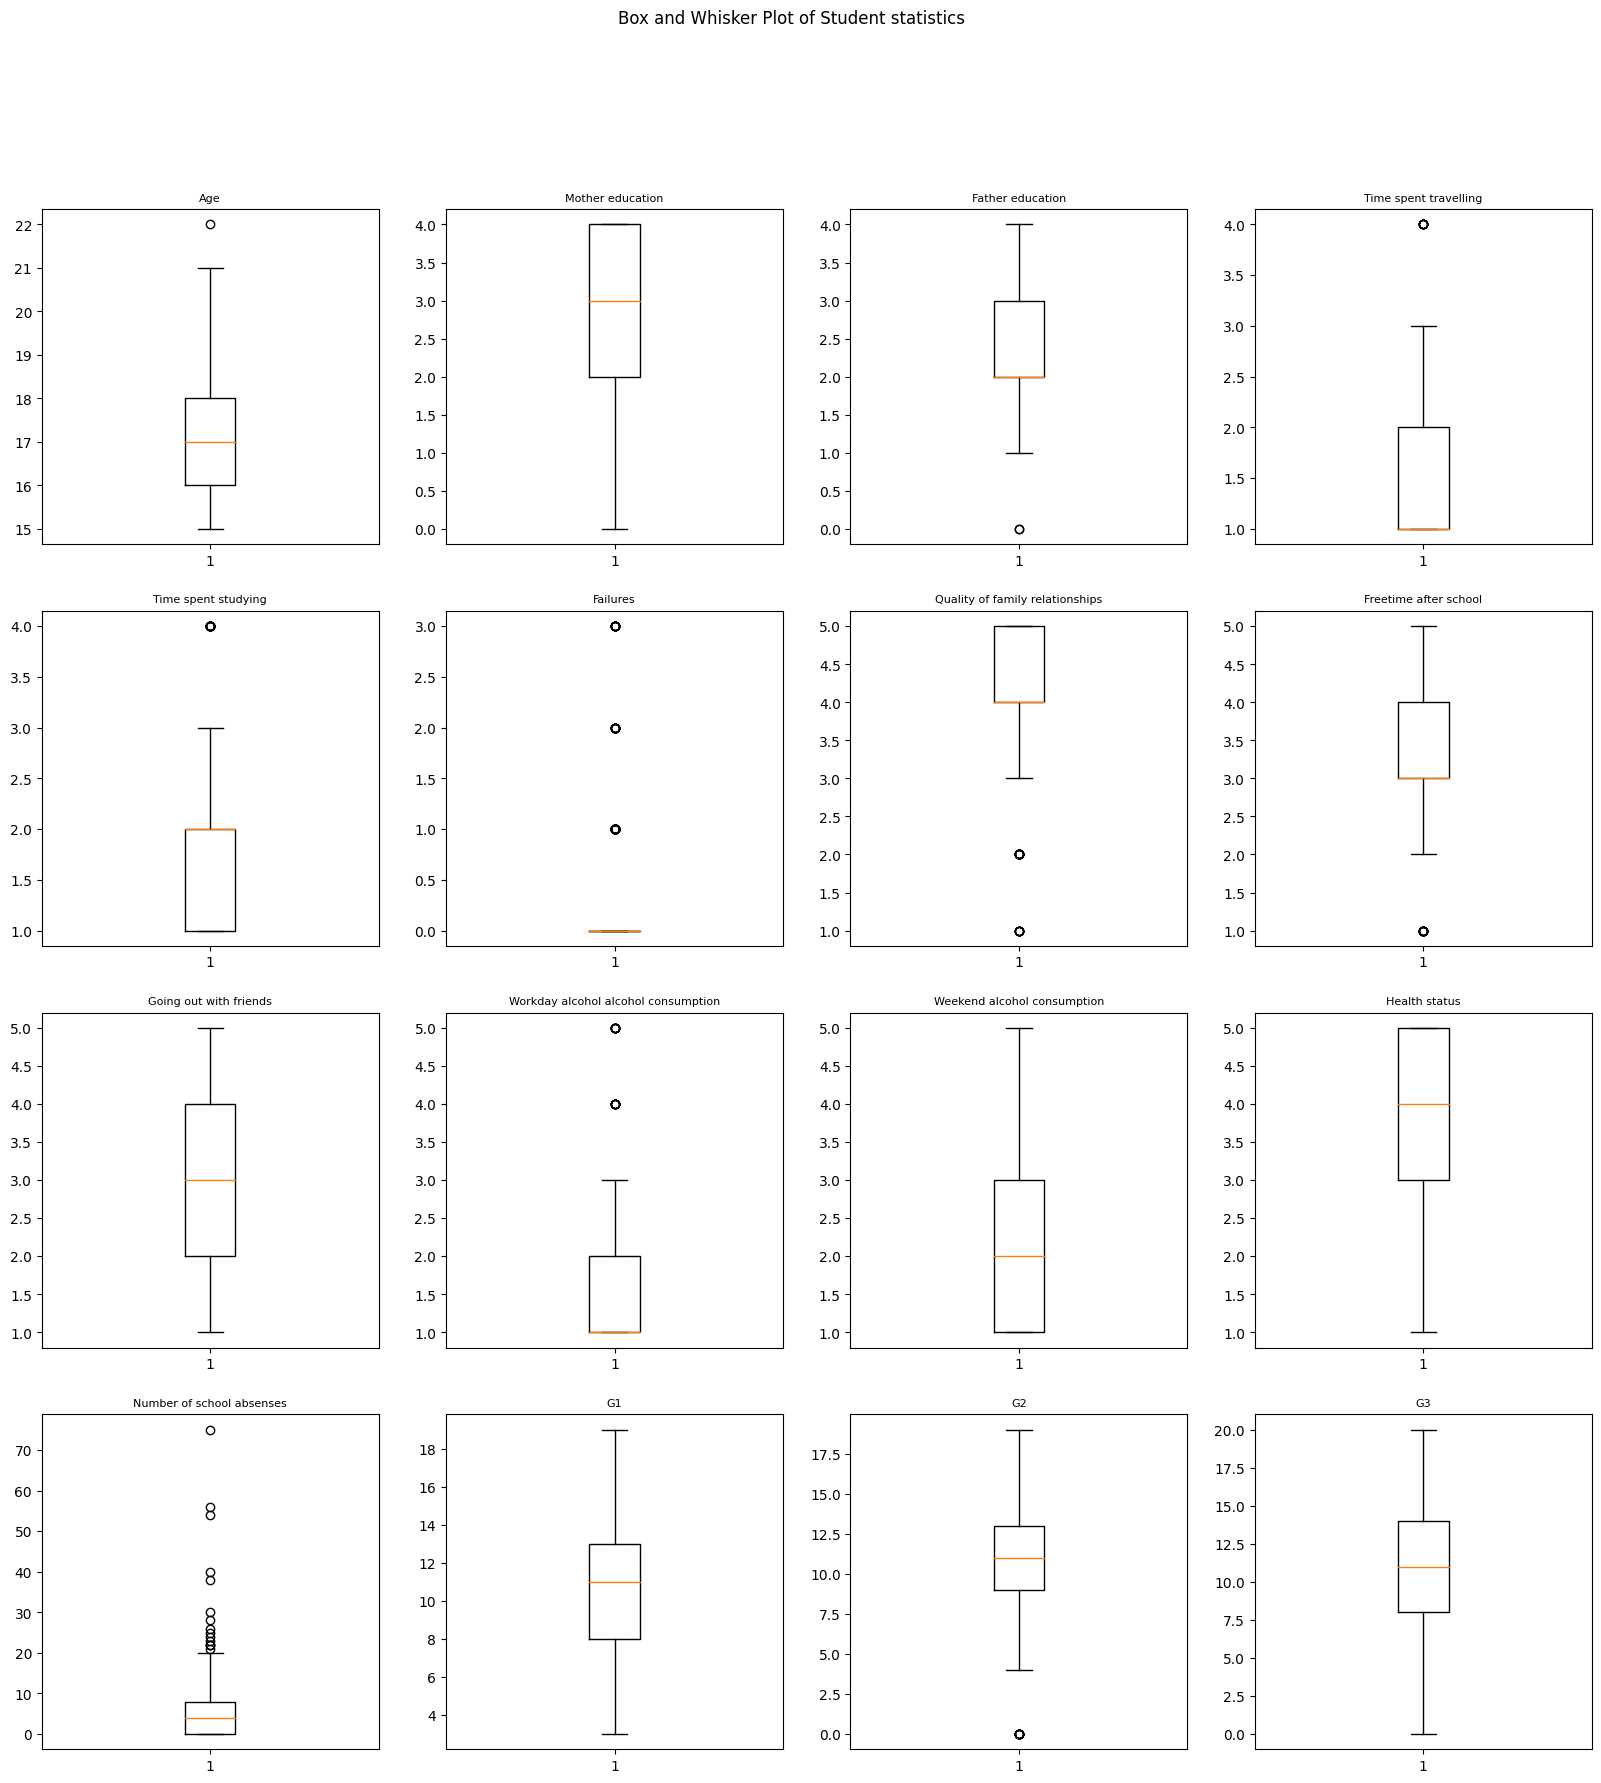

In [8]:
# Create a side by side box plot
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Box and Whisker Plot of Student statistics')
ax1.boxplot(x='age', data=df)
ax2.boxplot(x='Medu', data=df)
ax3.boxplot(x='Fedu', data=df)
ax4.boxplot(x='traveltime', data=df)
ax5.boxplot(x='studytime', data=df)
ax6.boxplot(x='failures', data=df)
ax7.boxplot(x='famrel', data=df)
ax8.boxplot(x='freetime', data=df)
ax9.boxplot(x='goout', data=df)
ax10.boxplot(x='Dalc', data=df)
ax11.boxplot(x='Walc', data=df)
ax12.boxplot(x='health', data=df)
ax13.boxplot(x='absences', data=df)
ax14.boxplot(x='G1', data=df)
ax15.boxplot(x='G2', data=df)
ax16.boxplot(x='G3', data=df)

ax1.set_title('Age', fontsize=8)
ax2.set_title('Mother education', fontsize=8)
ax3.set_title('Father education', fontsize=8)
ax4.set_title('Time spent travelling', fontsize=8)
ax5.set_title('Time spent studying', fontsize=8)
ax6.set_title('Failures', fontsize=8)
ax7.set_title('Quality of family relationships', fontsize=8)
ax8.set_title('Freetime after school', fontsize=8)
ax9.set_title('Going out with friends', fontsize=8)
ax10.set_title('Workday alcohol alcohol consumption', fontsize=8)
ax11.set_title('Weekend alcohol consumption', fontsize=8)
ax12.set_title('Health status', fontsize=8)
ax13.set_title('Number of school absenses', fontsize=8)
ax14.set_title('G1', fontsize=8)
ax15.set_title('G2', fontsize=8)
ax16.set_title('G3', fontsize=8)

Only absences appears to have outliers.

When dealing with outliers, we should ask 
1. Is this likely an data entry error or a true reflection of reality? 
2. Will these outliers cause bias in my dataset?

For absences the answers to this are:
1. It's plausible that there are students that are absent 70 days a year, I remember kids like that from my high school.
2. To test this, we would have to build two models: one with the outliers and one without the outliers and see which performs better.

## What is the spread of all the data?

Text(0.5, 1.0, 'School of learner')

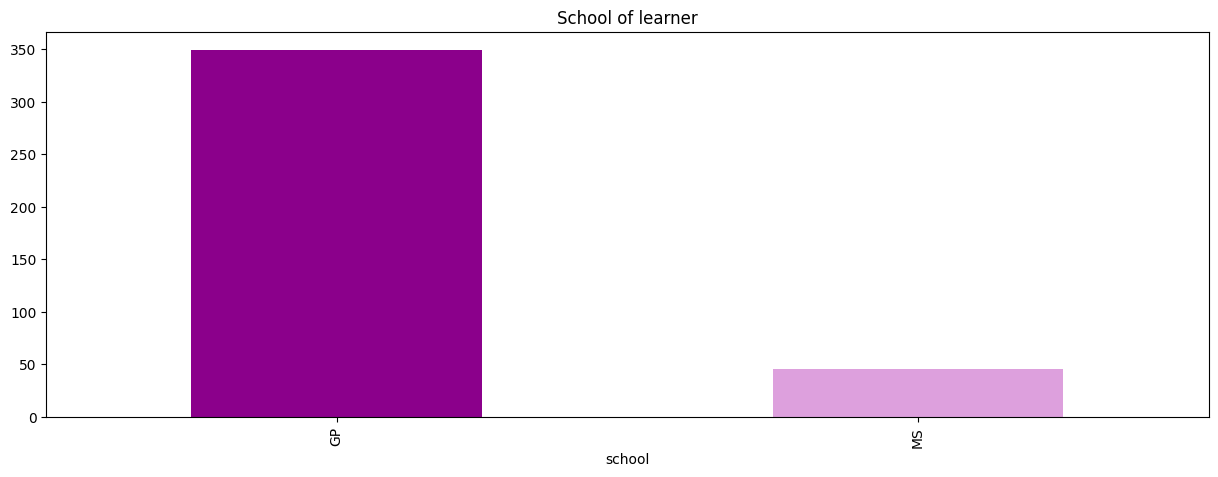

In [9]:
df['school'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('School of learner') 

Text(0.5, 1.0, 'Sex of learner')

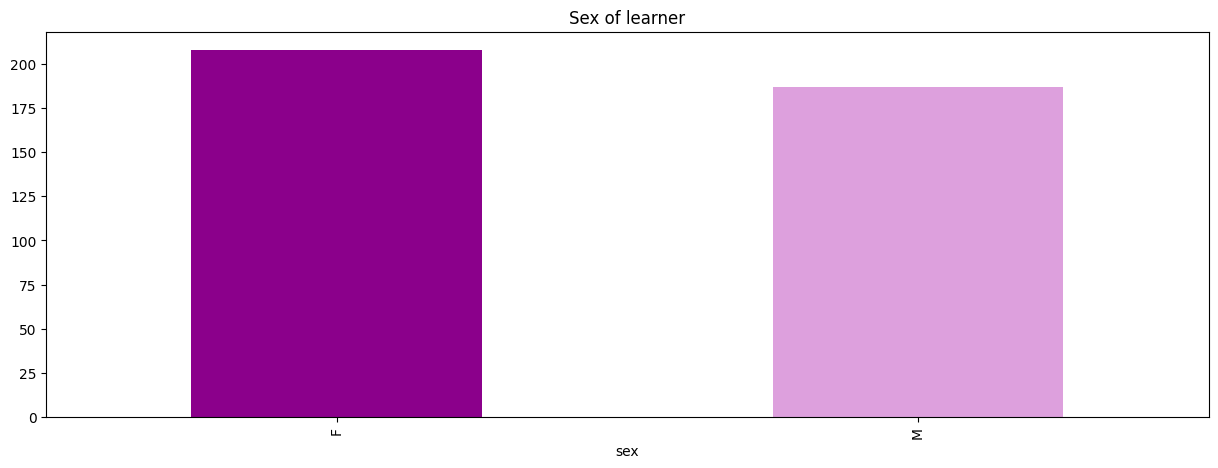

In [10]:
df['sex'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Sex of learner') 

Text(0.5, 1.0, 'Age of learner')

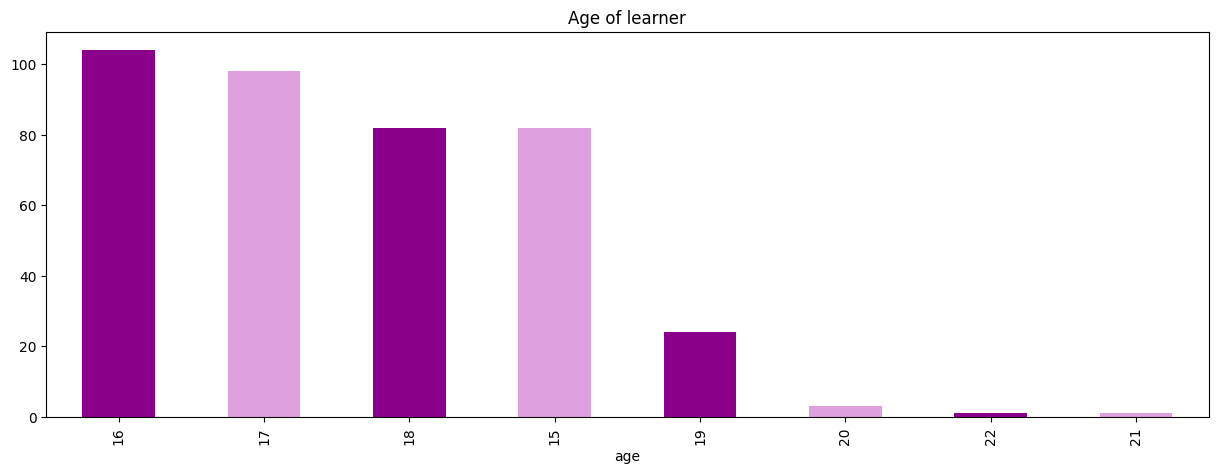

In [11]:
df['age'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Age of learner') 

Text(0.5, 1.0, 'Rural or Urban Dwelling')

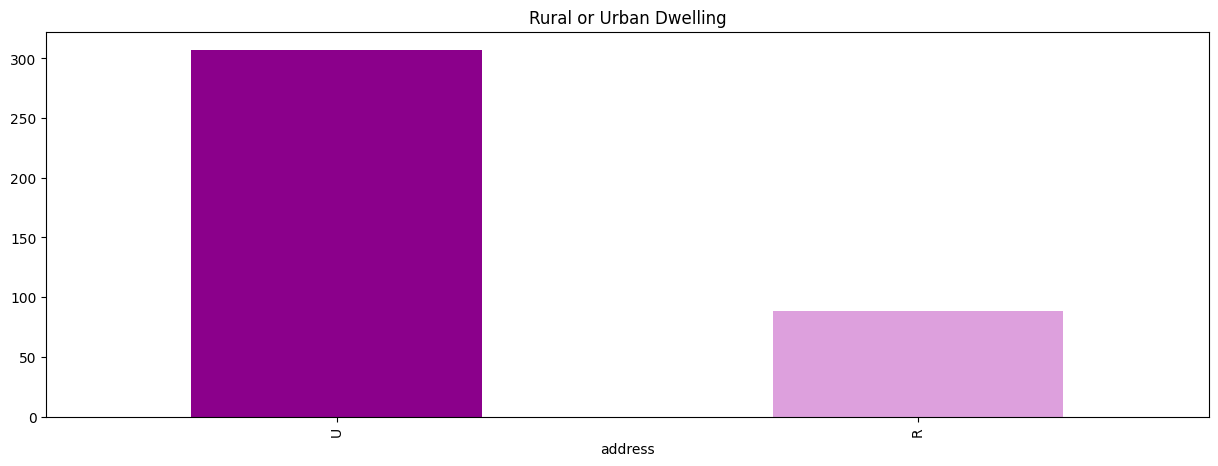

In [12]:
df['address'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Rural or Urban Dwelling') 

Text(0.5, 1.0, 'Family size of learner')

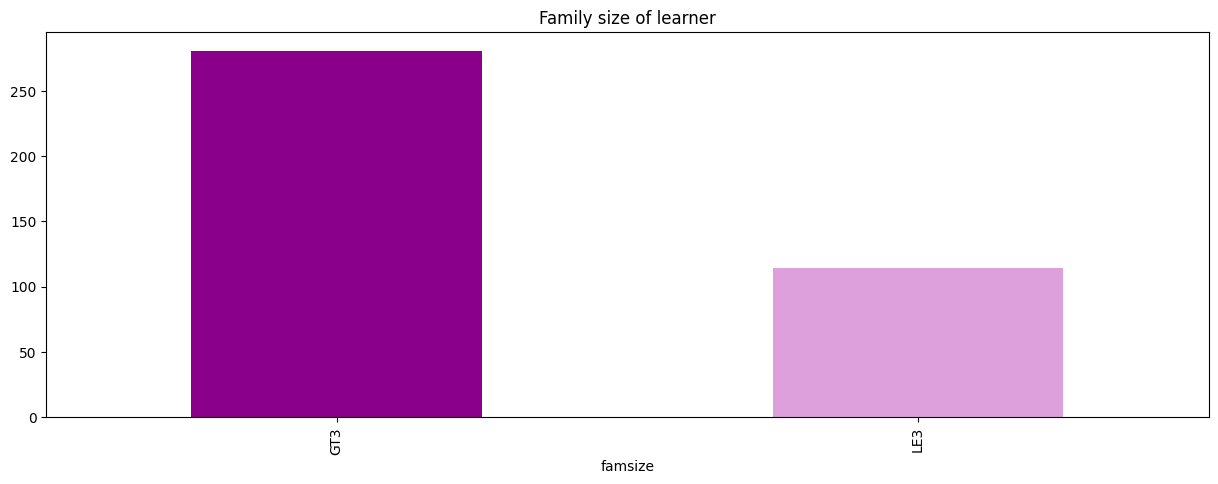

In [13]:
df['famsize'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Family size of learner') 

Text(0.5, 1.0, 'Parent cohabitation status')

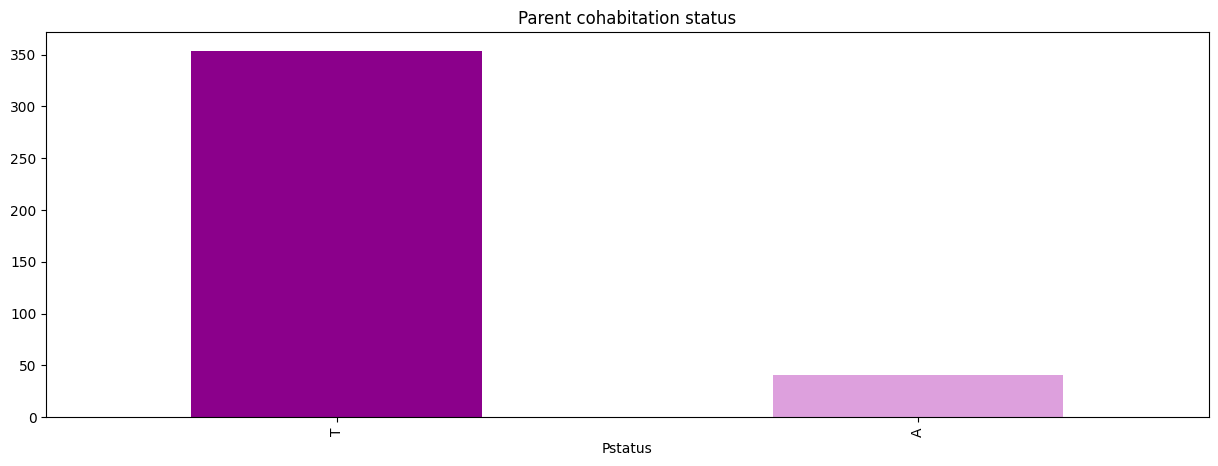

In [14]:
df['Pstatus'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Parent cohabitation status') 

Text(0.5, 1.0, 'Mother education')

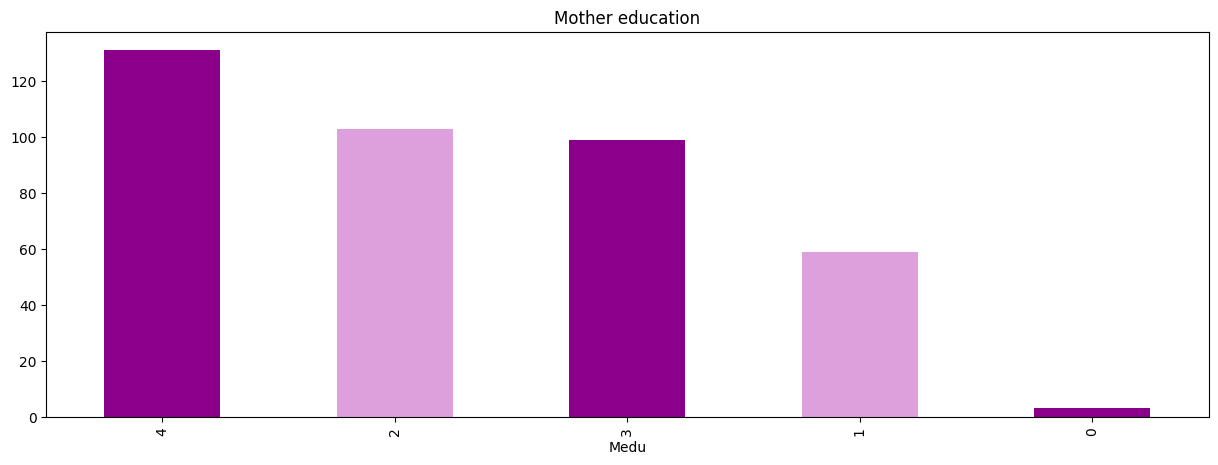

In [15]:
df['Medu'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Mother education') 

Text(0.5, 1.0, 'Father education')

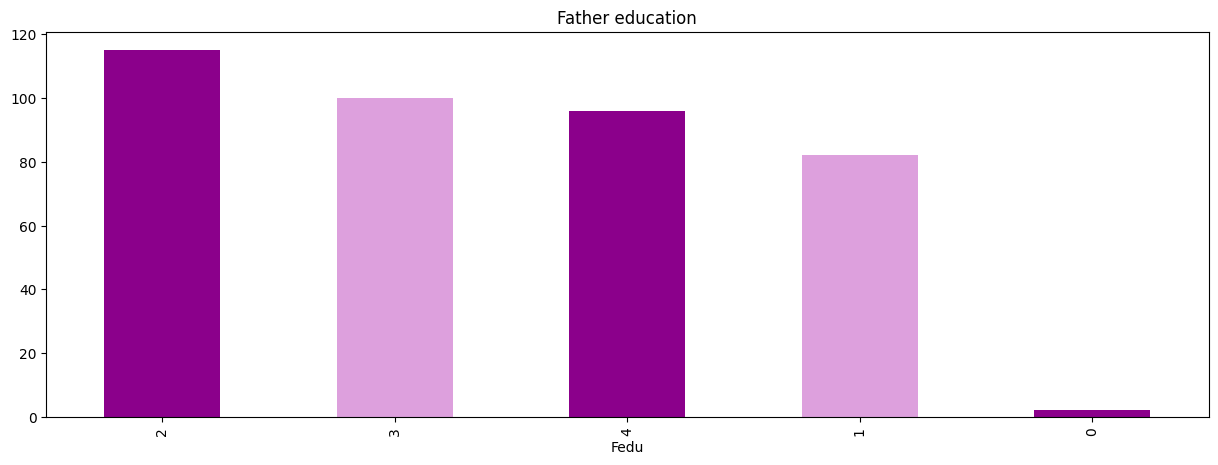

In [16]:
df['Fedu'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Father education') 

Text(0.5, 1.0, 'Mother job')

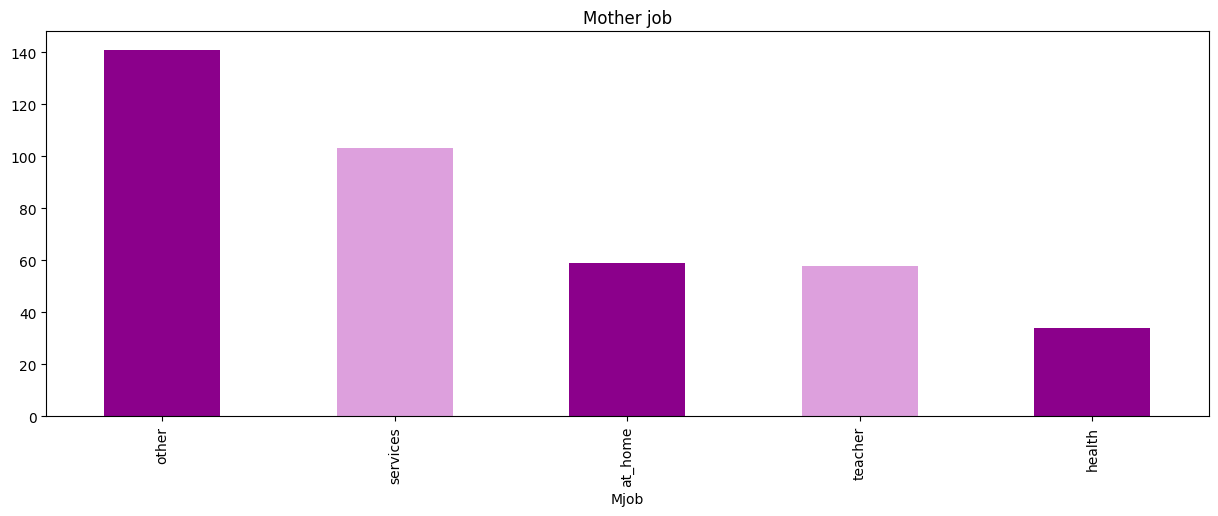

In [17]:
df['Mjob'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Mother job') 

Text(0.5, 1.0, 'Father job')

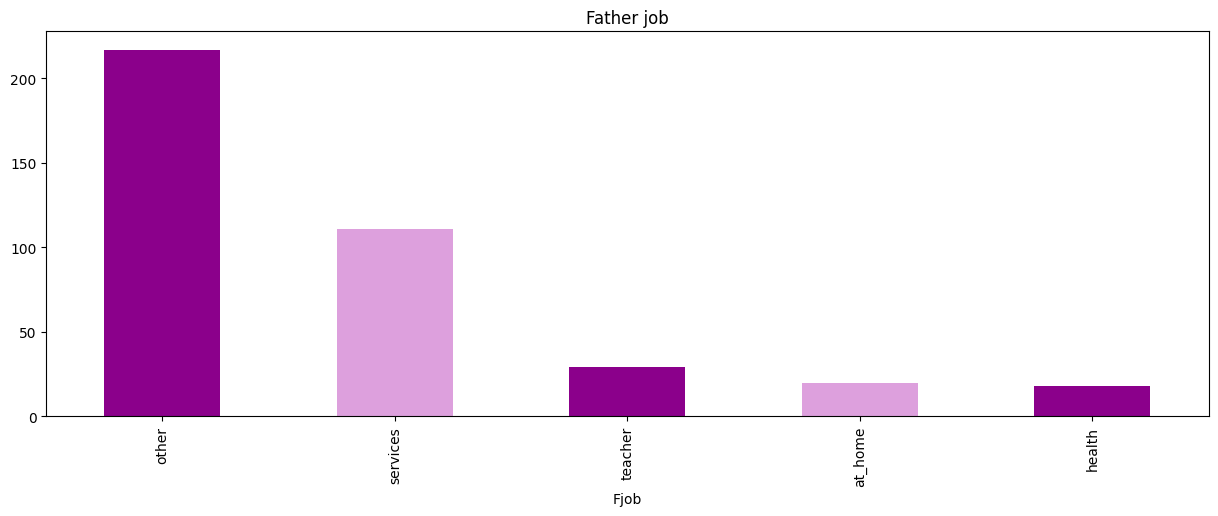

In [18]:
df['Fjob'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Father job') 

Text(0.5, 1.0, 'Reason to choose this school')

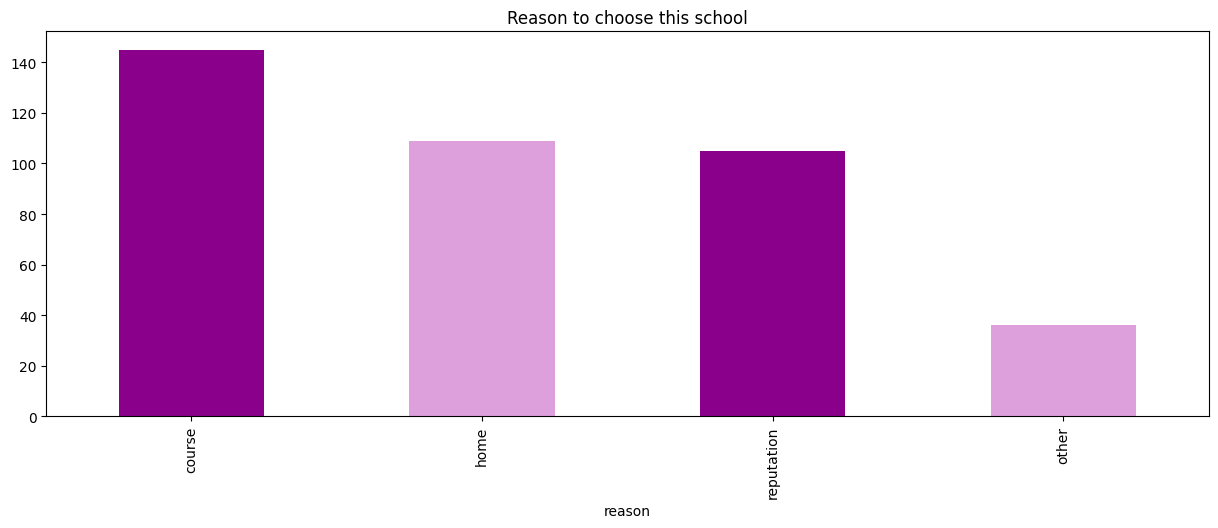

In [19]:
df['reason'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Reason to choose this school') 

Text(0.5, 1.0, 'Guardian of Student')

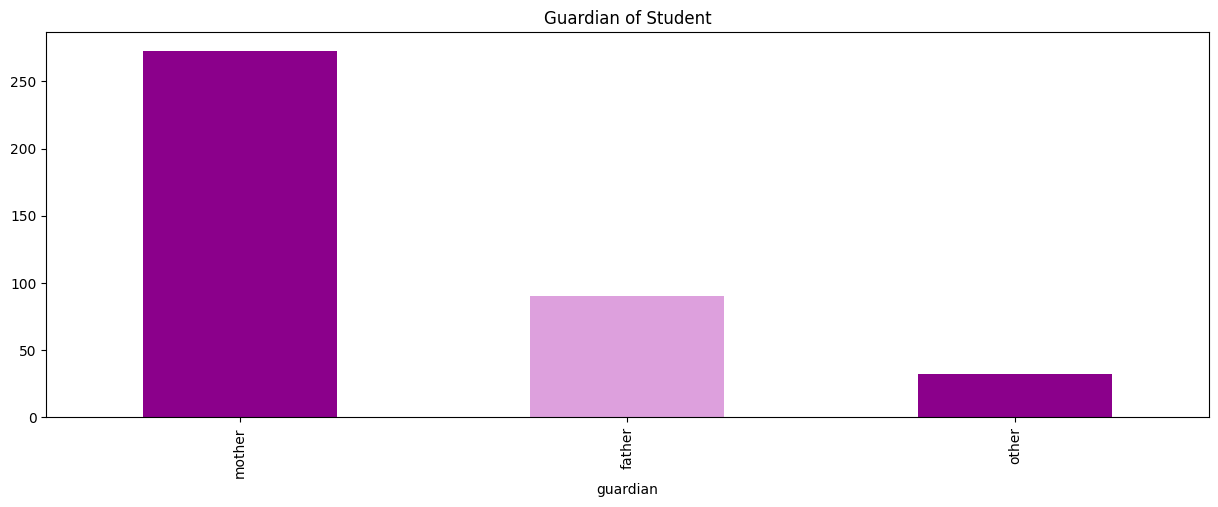

In [20]:
df['guardian'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Guardian of Student') 

Text(0.5, 1.0, 'Time to travel from home to school')

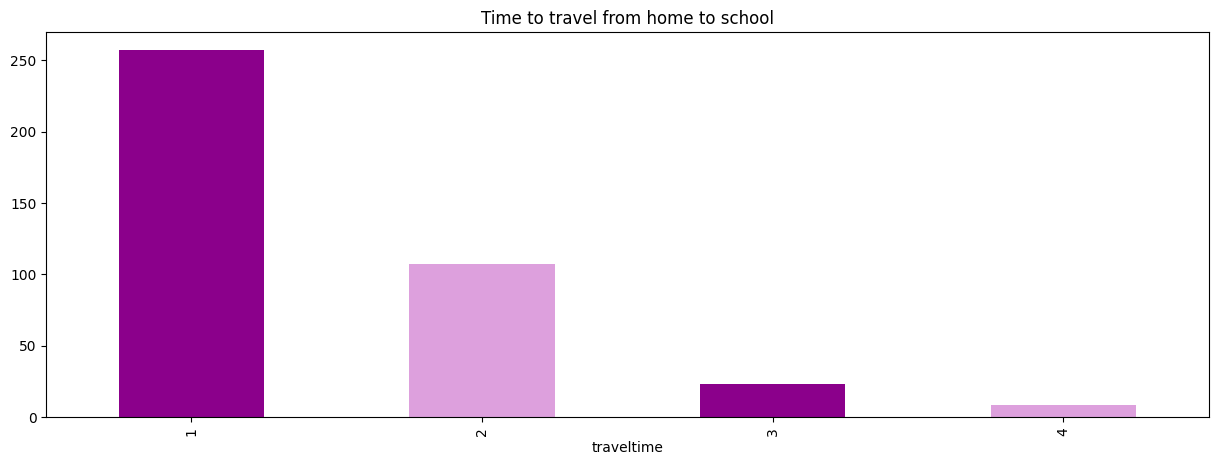

In [21]:
df['traveltime'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Time to travel from home to school') 

Text(0.5, 1.0, 'Weekly study time')

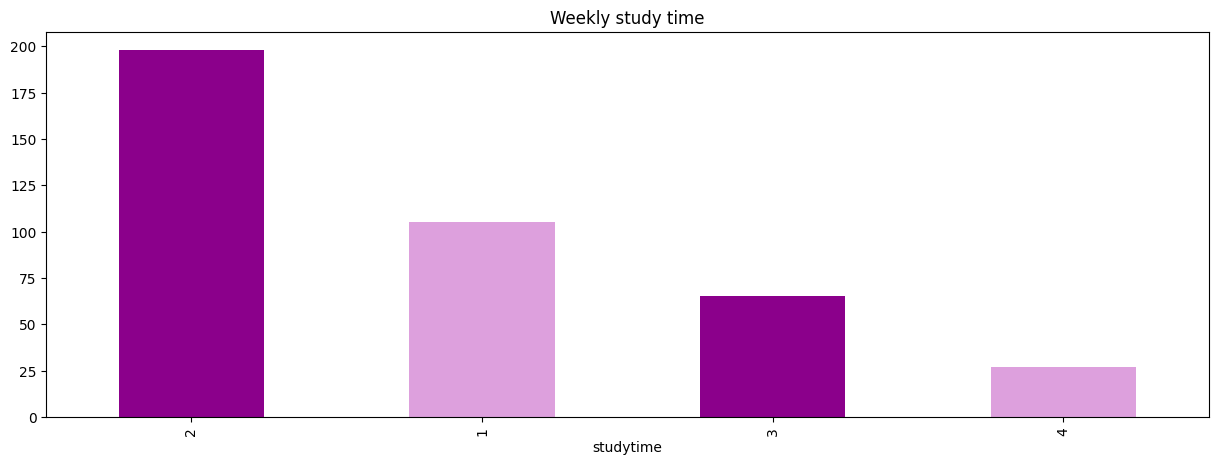

In [22]:
df['studytime'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Weekly study time') 

Text(0.5, 1.0, 'Number of past class failures')

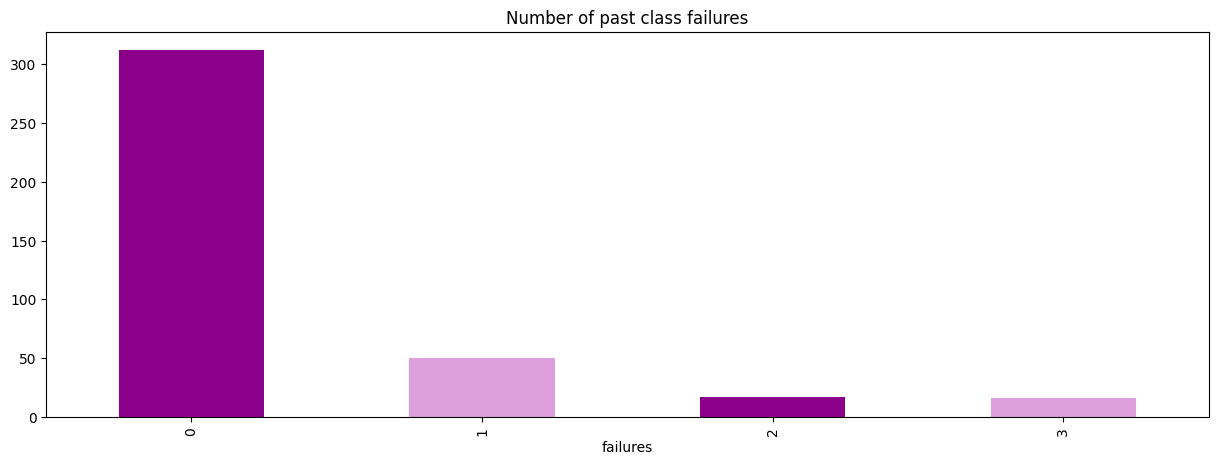

In [23]:
df['failures'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Number of past class failures') 

Text(0.5, 1.0, 'Extra educational support')

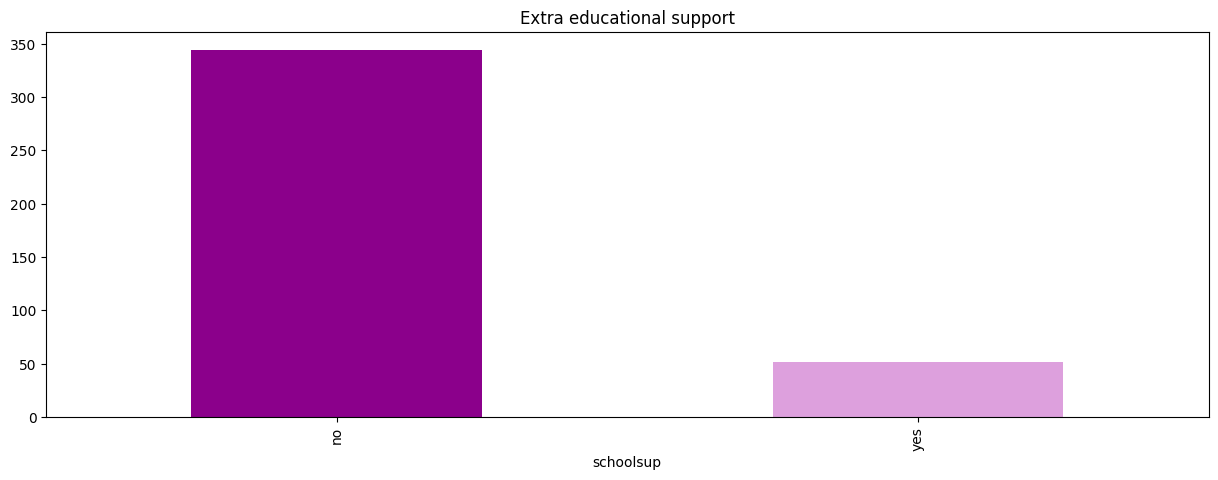

In [24]:
df['schoolsup'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Extra educational support') 

Text(0.5, 1.0, 'Family educational support')

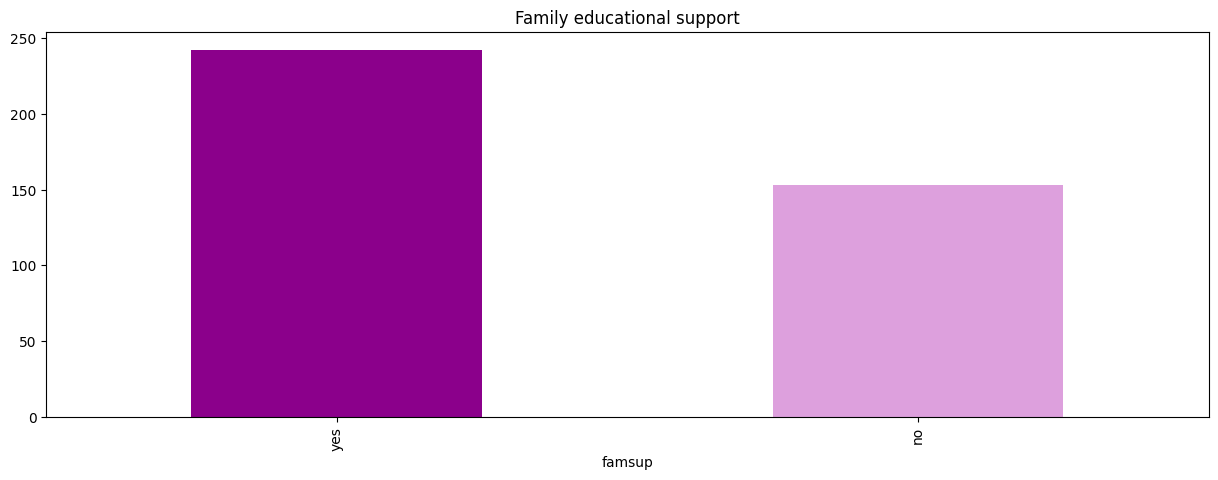

In [25]:
df['famsup'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Family educational support') 

Text(0.5, 1.0, 'Extra paid maths classes')

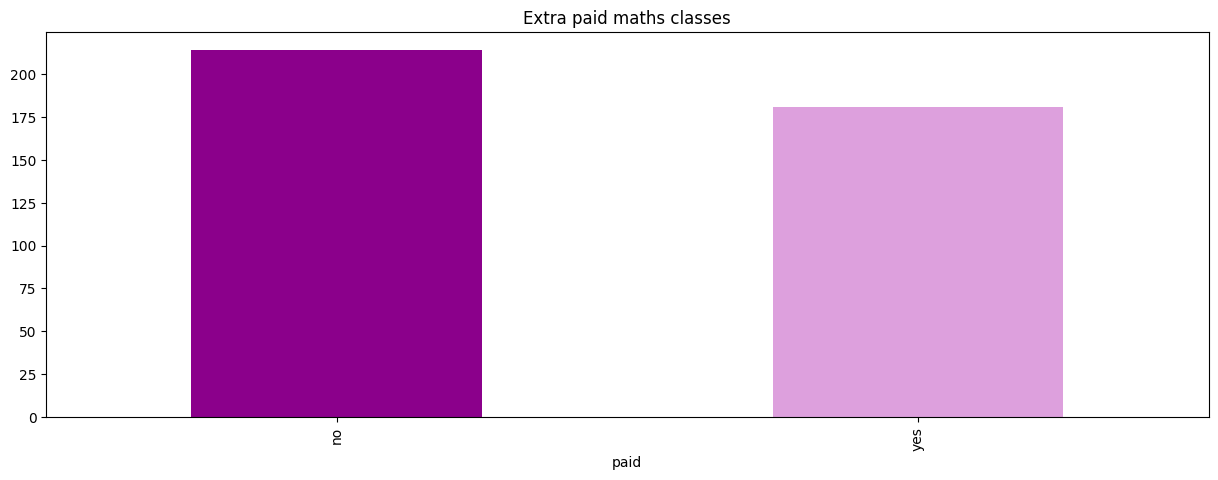

In [26]:
df['paid'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Extra paid maths classes') 

Text(0.5, 1.0, 'Extra-Curricular activities')

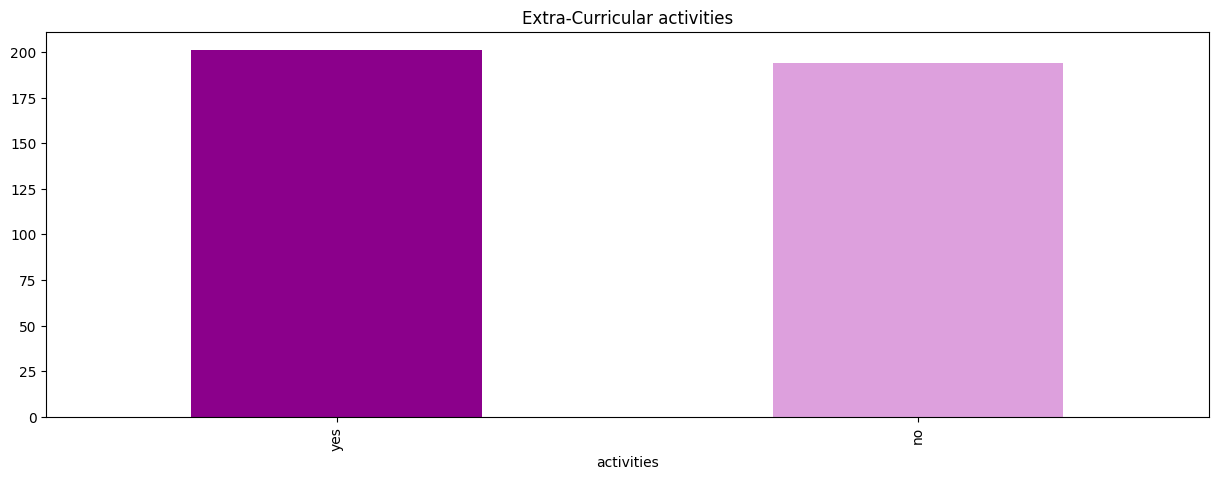

In [27]:
df['activities'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Extra-Curricular activities') 

Text(0.5, 1.0, 'Attended nursery school')

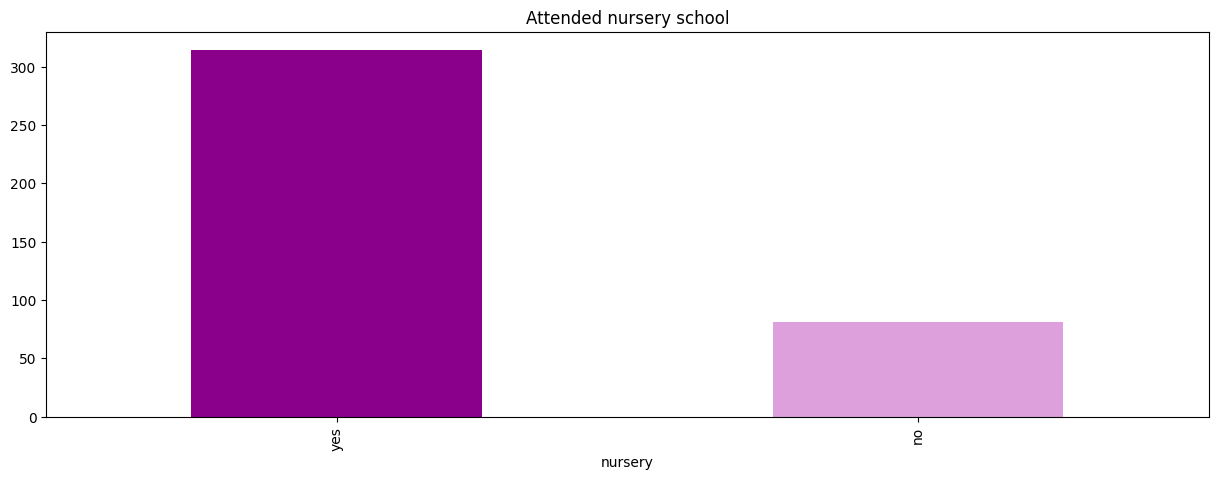

In [28]:
df['nursery'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Attended nursery school') 

Text(0.5, 1.0, 'Wants to study beyond high school')

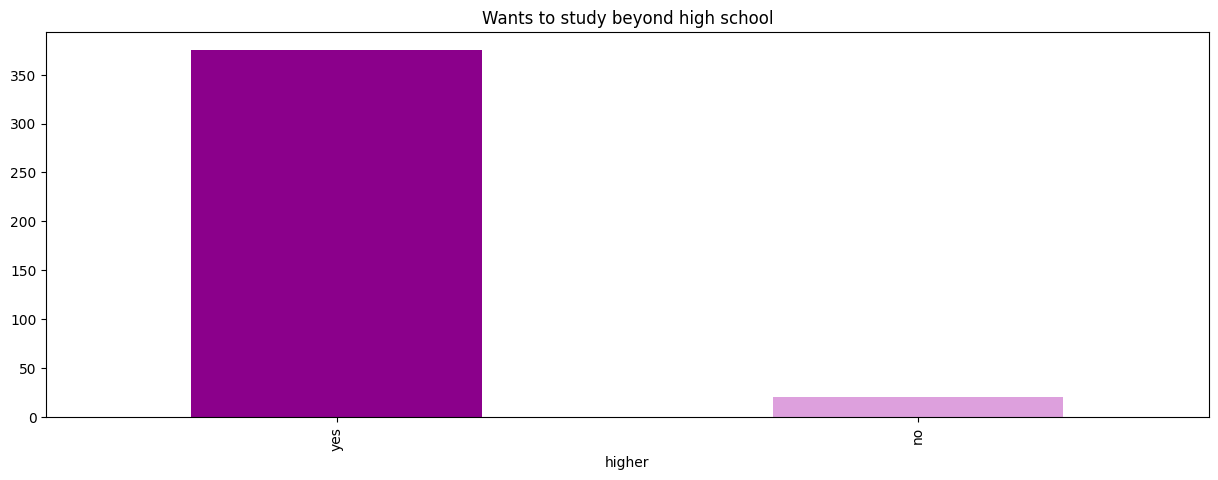

In [29]:
df['higher'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Wants to study beyond high school') 

Text(0.5, 1.0, 'Internet access at home')

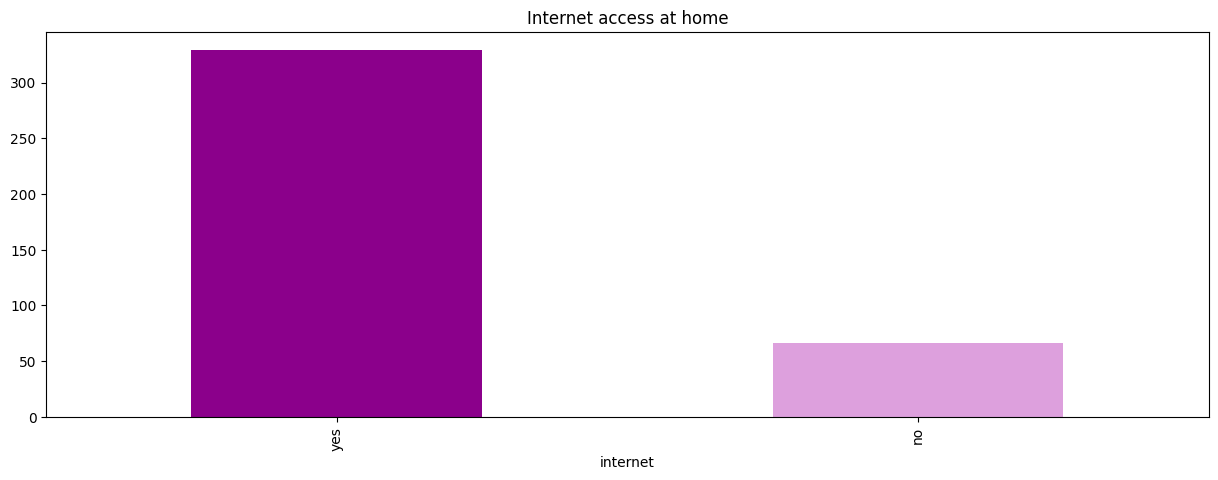

In [30]:
df['internet'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Internet access at home') 

Text(0.5, 1.0, 'In a romantic relationship')

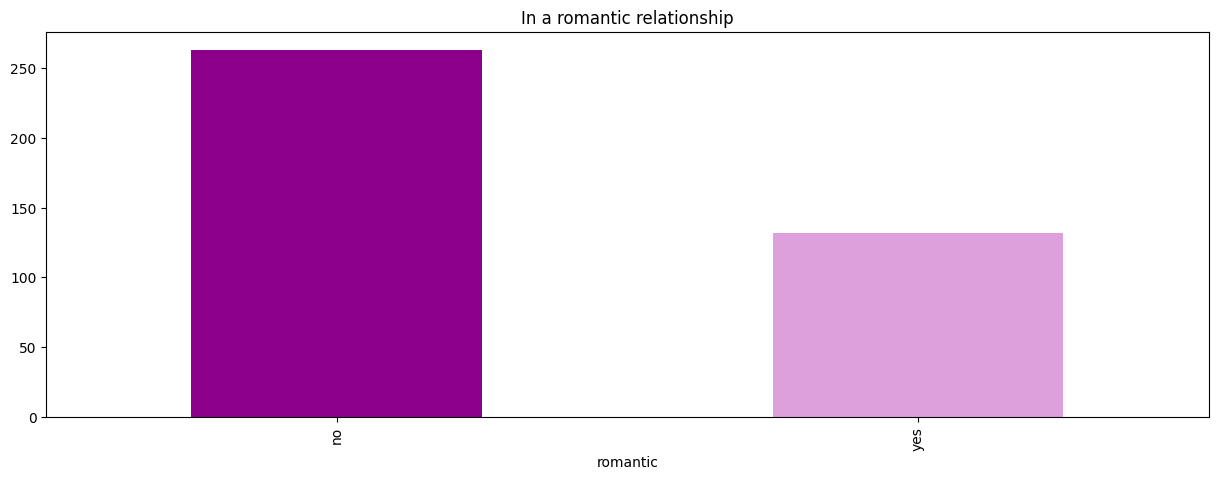

In [31]:
df['romantic'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('In a romantic relationship') 

Text(0.5, 1.0, 'Quality of family relationships')

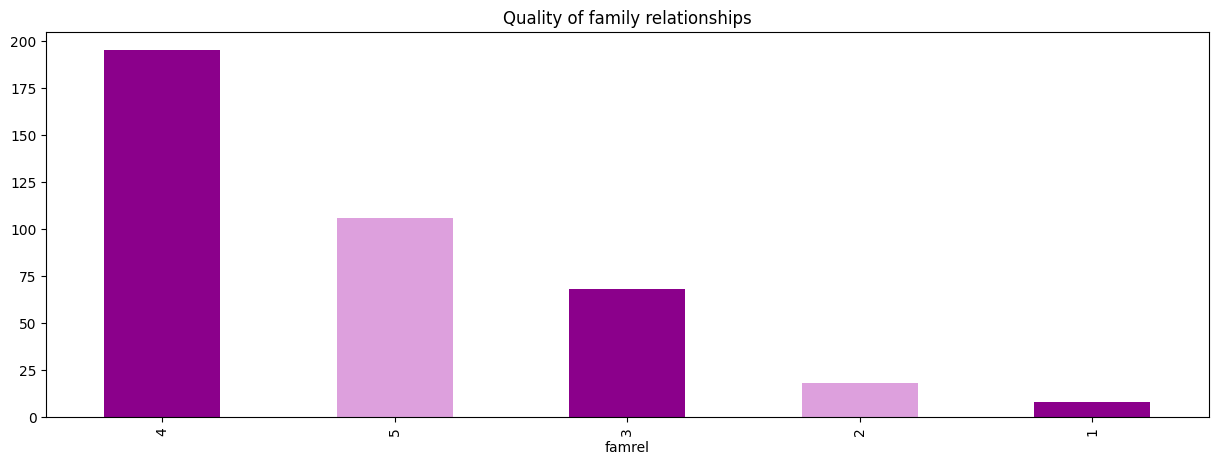

In [32]:
df['famrel'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Quality of family relationships') 

Text(0.5, 1.0, 'Free time after school')

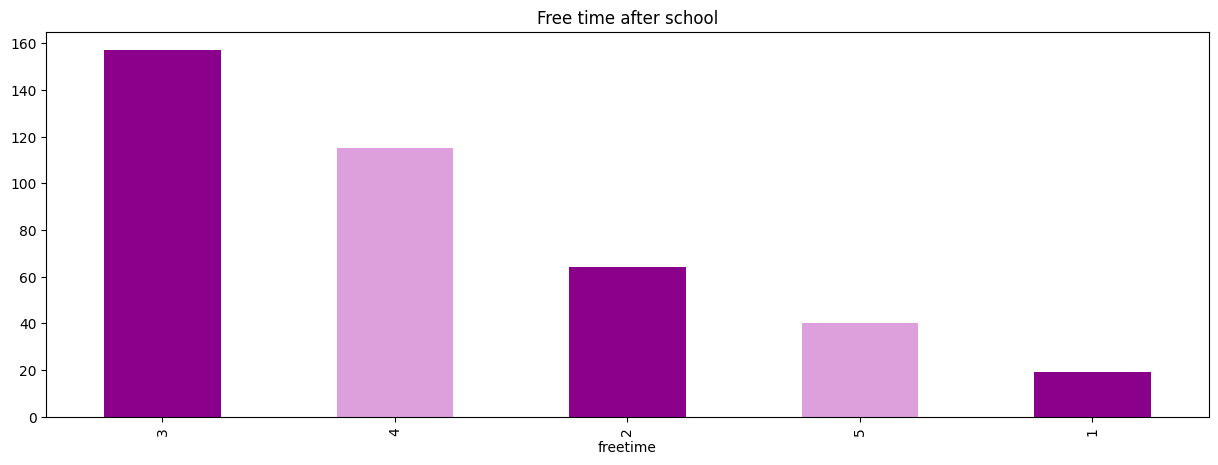

In [33]:
df['freetime'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Free time after school') 

Text(0.5, 1.0, 'Going out with friends')

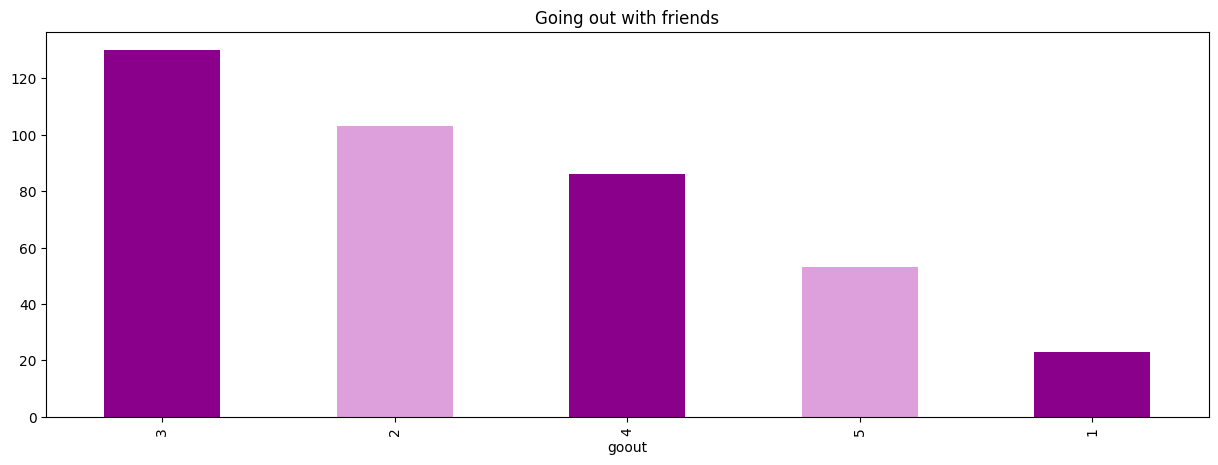

In [34]:
df['goout'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Going out with friends') 

Text(0.5, 1.0, 'Workday alcohol consumption')

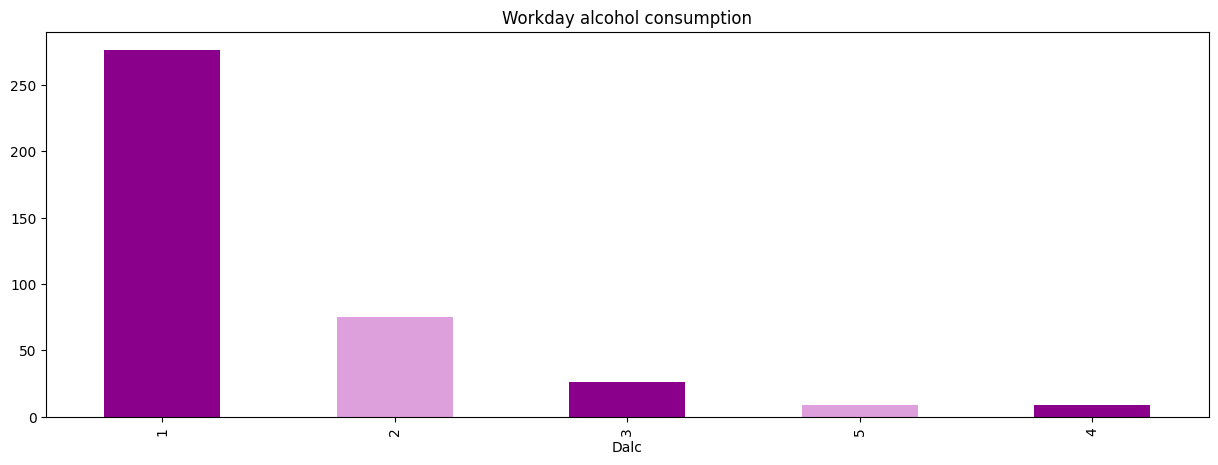

In [35]:
df['Dalc'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Workday alcohol consumption') 

Text(0.5, 1.0, 'Weekend alcohol consumption')

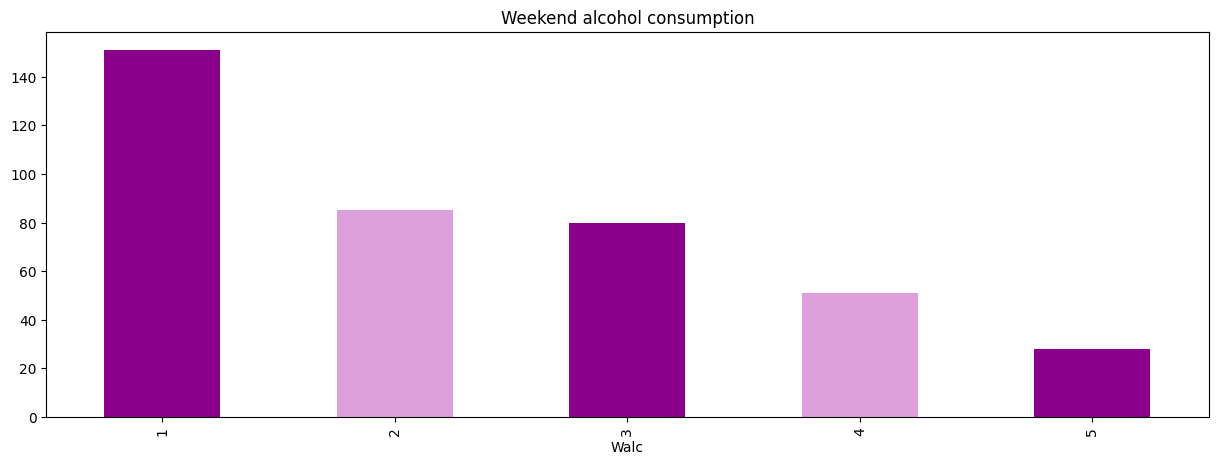

In [36]:
df['Walc'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Weekend alcohol consumption') 

Text(0.5, 1.0, 'Current health status')

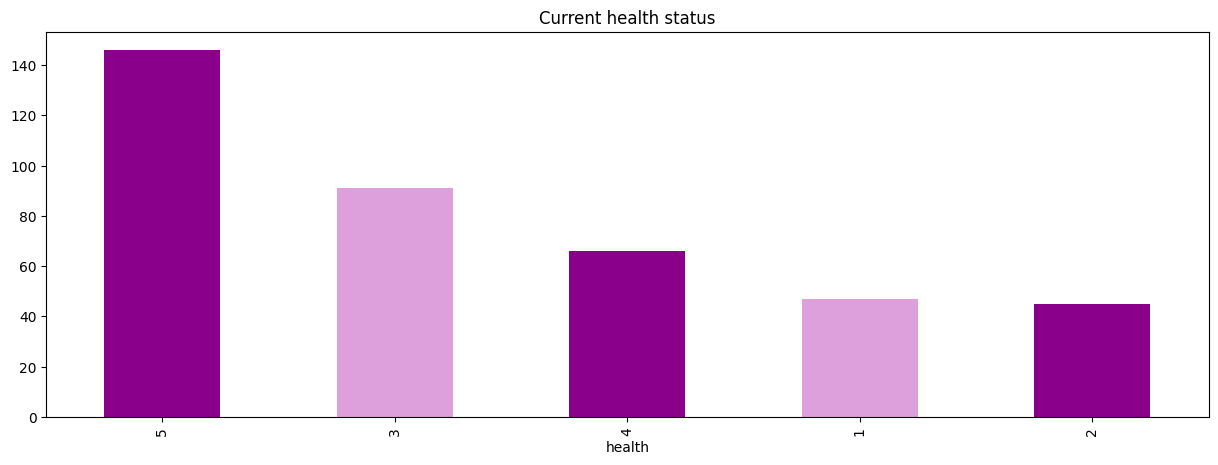

In [37]:
df['health'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Current health status') 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='absences', ylabel='Count'>

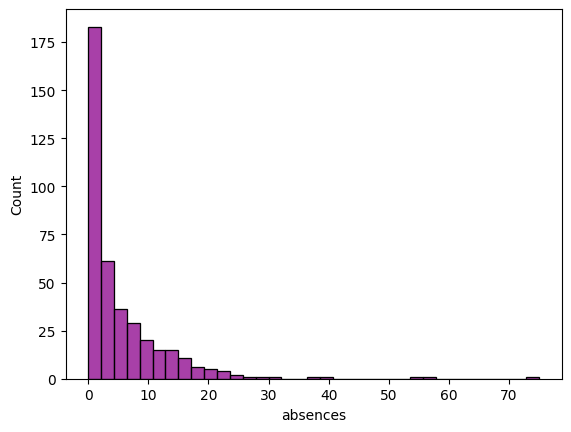

In [38]:
sns.histplot(data=df, x="absences", color="darkmagenta")

Text(0.5, 1.0, 'First period grade')

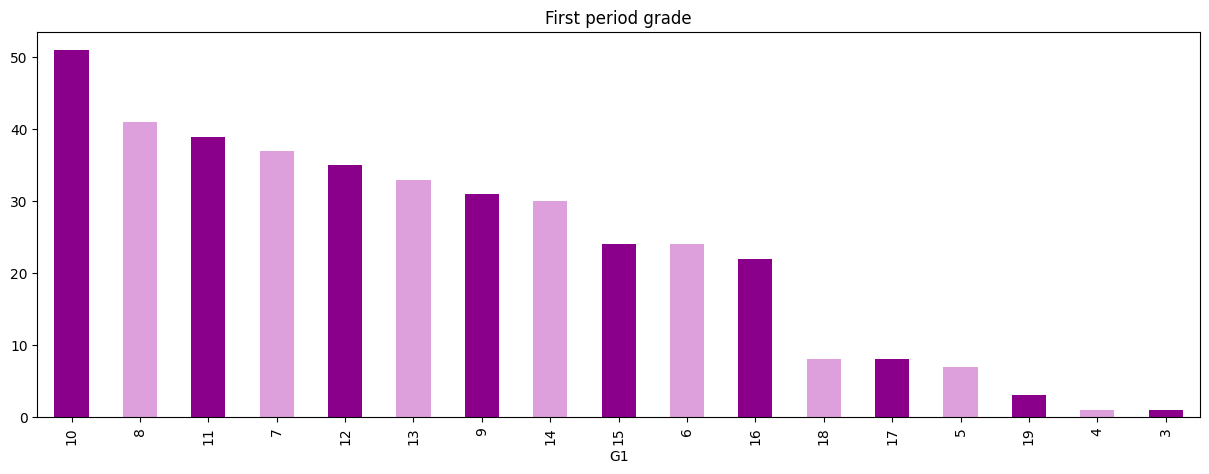

In [39]:
df['G1'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('First period grade') 

Text(0.5, 1.0, 'Second period grade')

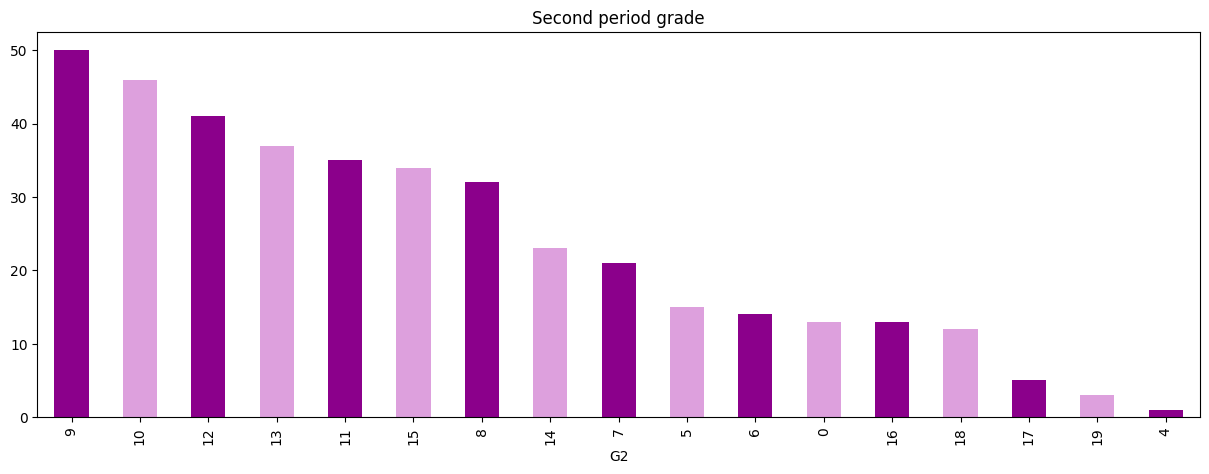

In [40]:
df['G2'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Second period grade') 

Text(0.5, 1.0, 'Final grade')

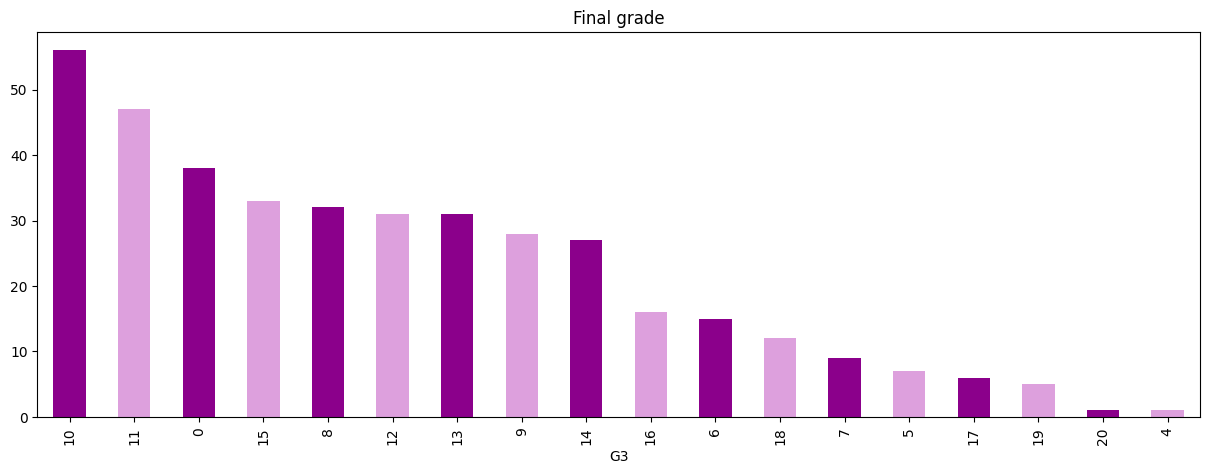

In [41]:
df['G3'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Final grade') 

## Is there a relationship between health status, absences, failures, and the final grade a student receives?

Text(0.5, 1.0, 'Relationship between health, absences, failures, and final grade')

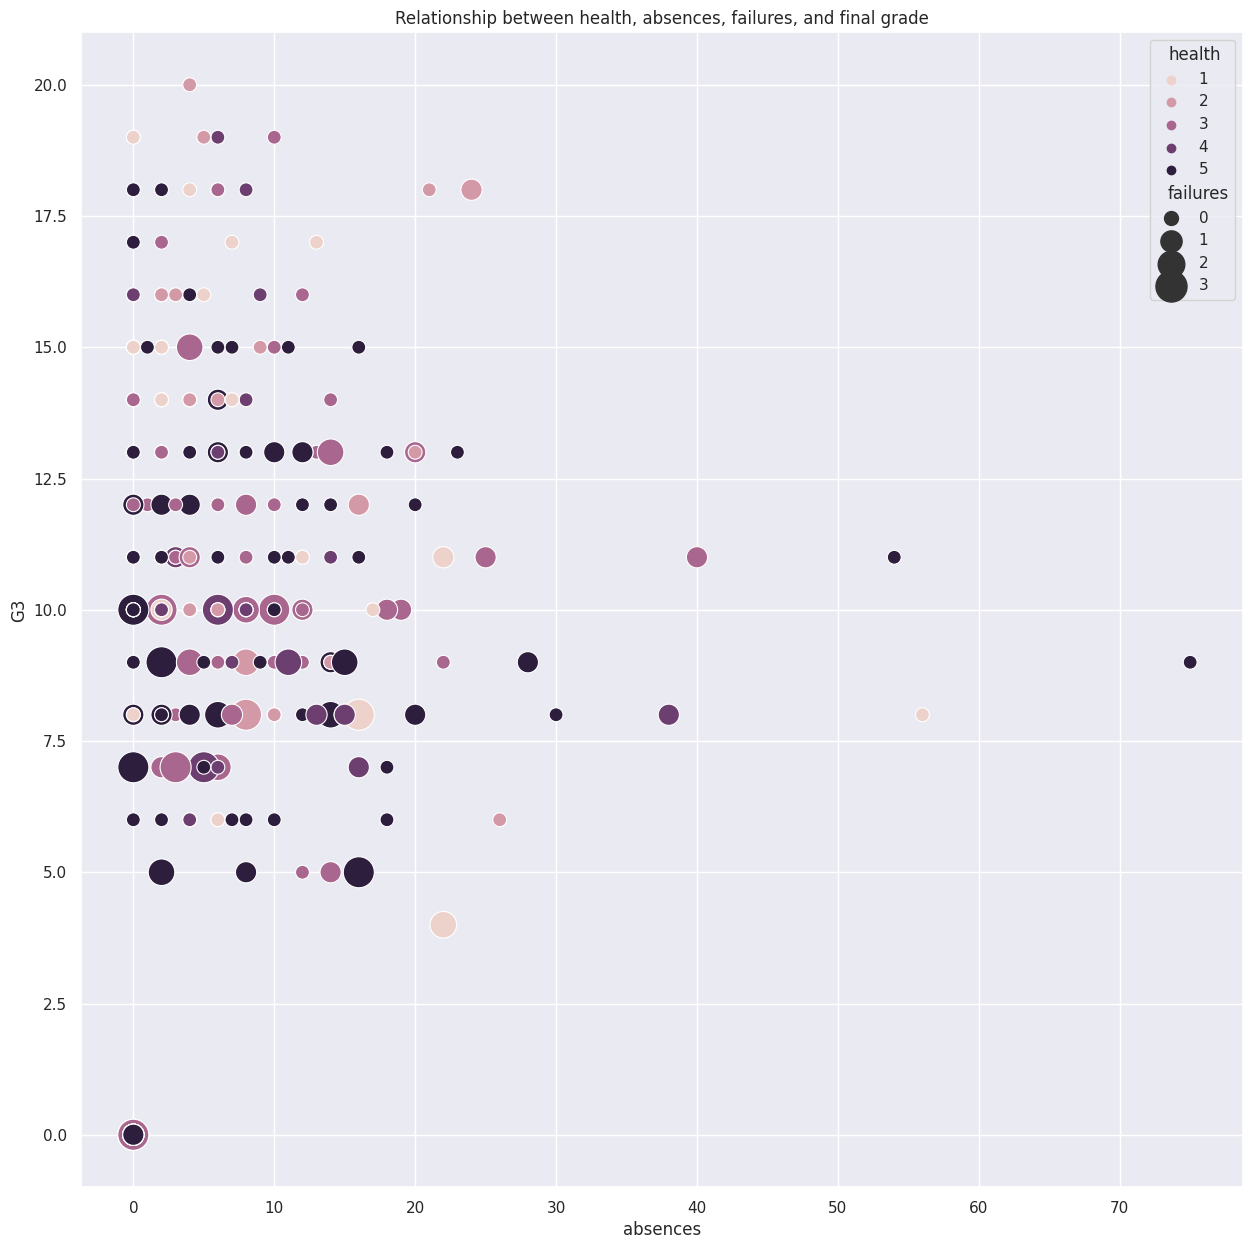

In [42]:
sns.set_theme(rc={'figure.figsize':(15,15)})
sns.scatterplot(data=df, x="absences", y="G3", hue="health", size="failures", sizes=(100, 500))
plt.title('Relationship between health, absences, failures, and final grade')

## How do males and females differ in their maths marks?

Text(0.5, 1.0, 'Relationship between sex of student and final mark')

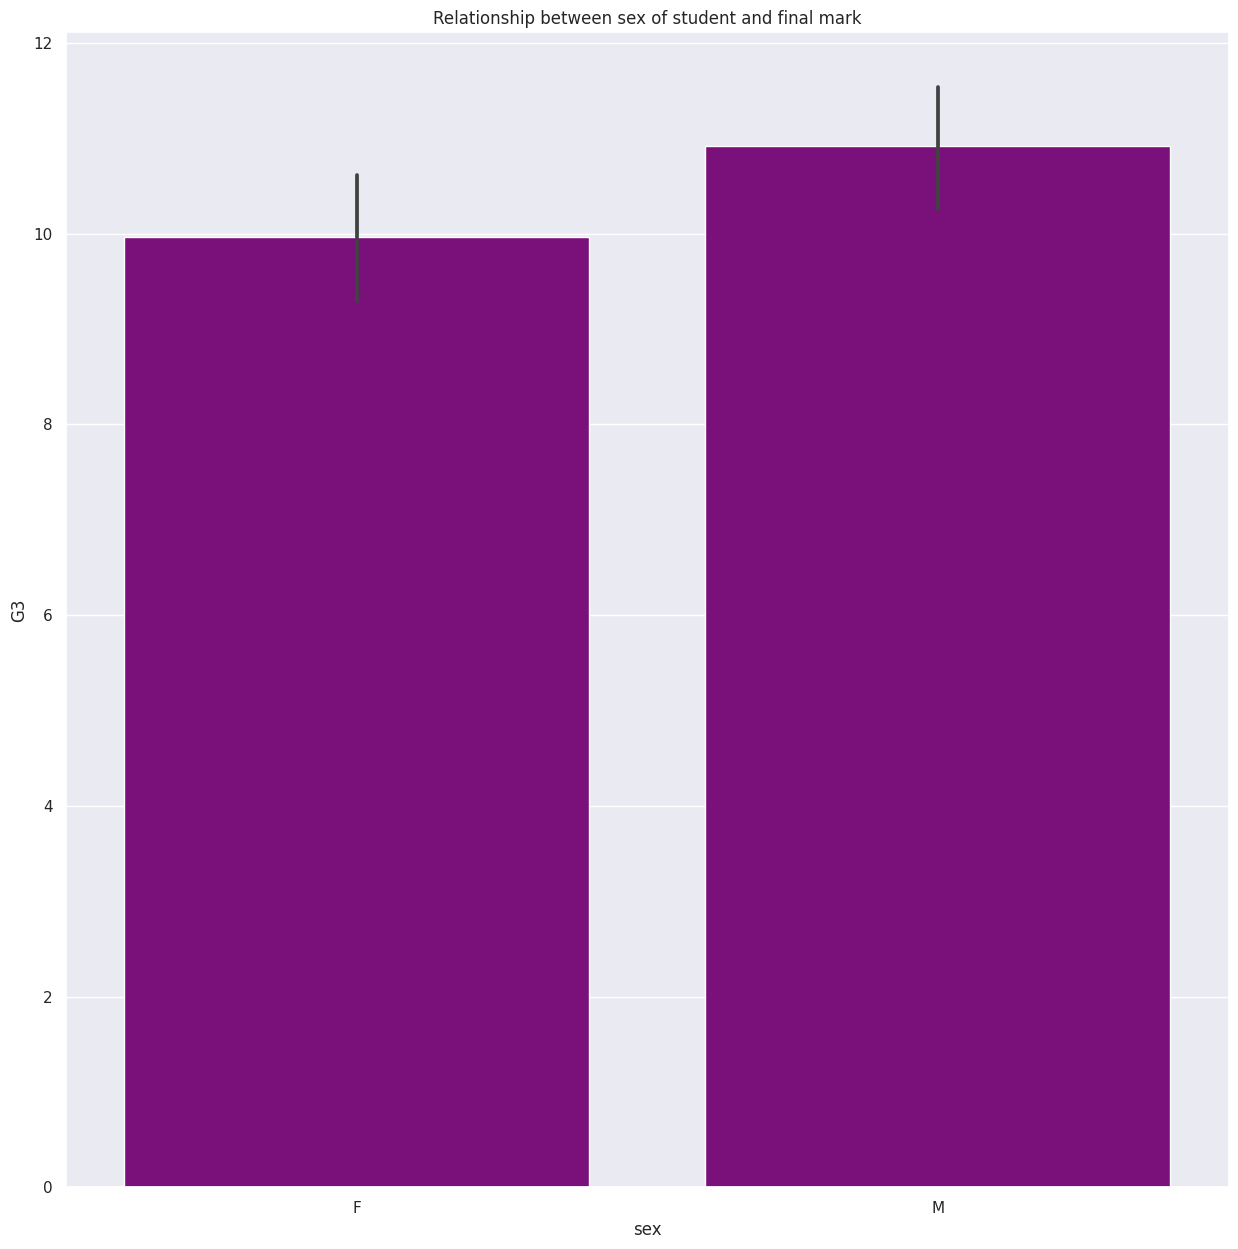

In [43]:
sns.barplot(df, x="sex", y="G3", color='darkmagenta')
plt.title('Relationship between sex of student and final mark')

We could investigate the reasons for this further, using the same technique as shown below.

## Does the student's school affect their mark?

Text(0.5, 1.0, 'Relationship between school of learner and final mark')

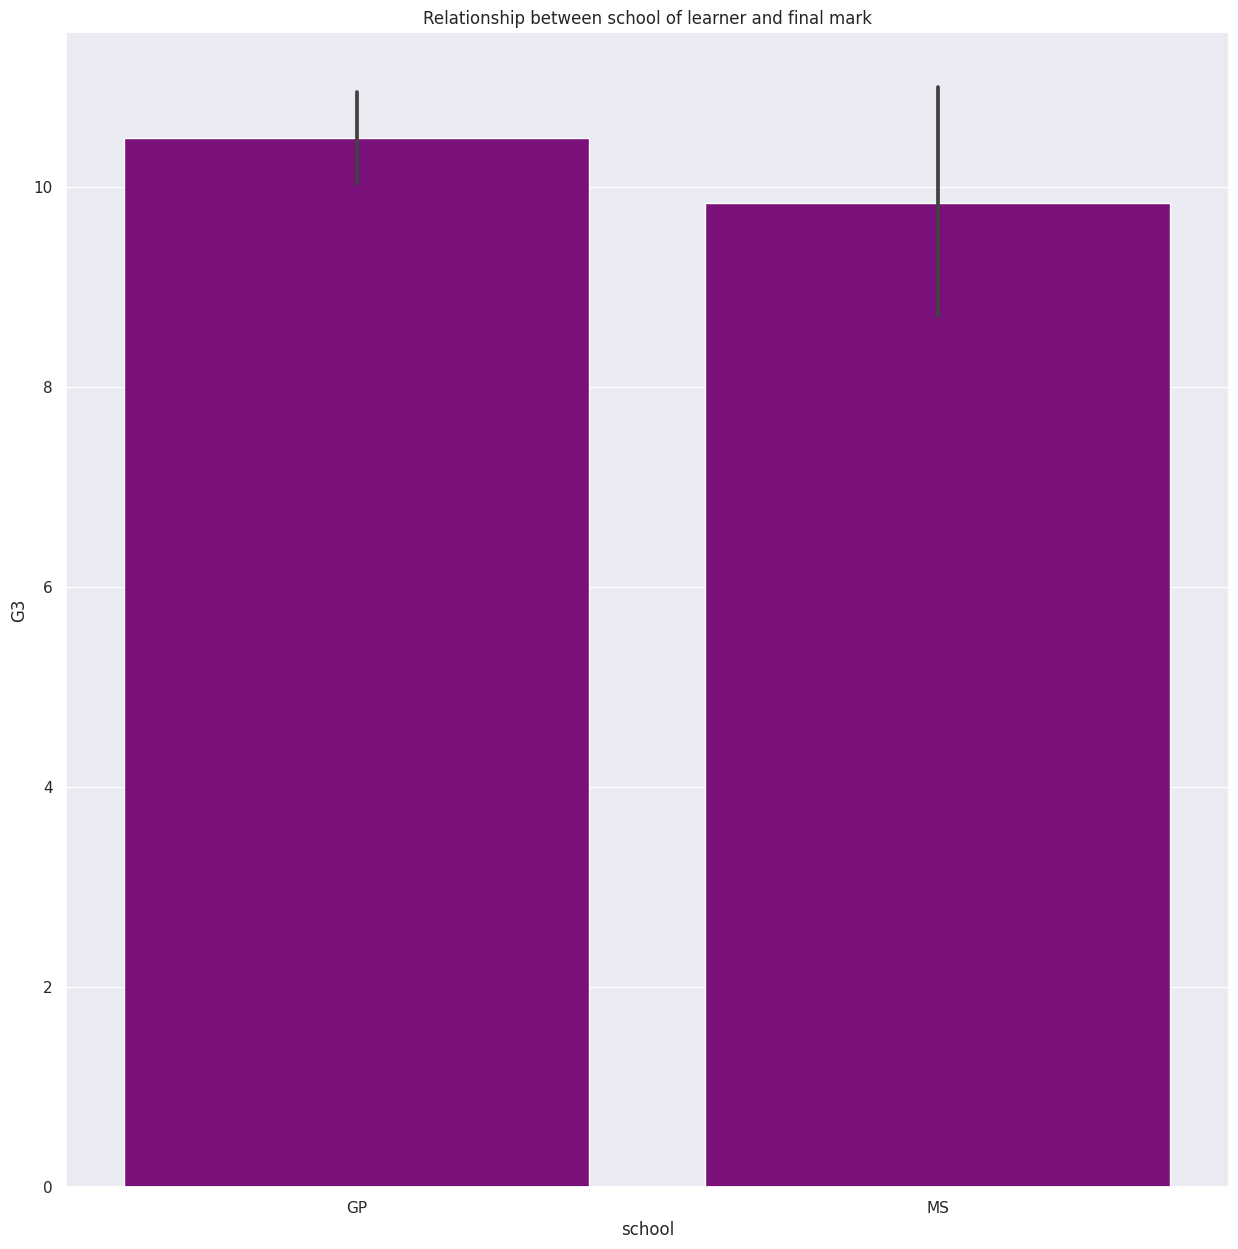

In [44]:
sns.barplot(df, x="school", y="G3", color='darkmagenta')
plt.title('Relationship between school of learner and final mark')

## Are the students at one school wealthier than the students at the other?

Let's use internet access as a crude proxy for wealth.

In [45]:
# Creating a dataframe with only the GP school students
gp_df = df[df['school']=='GP']
gp_df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [46]:
# Creating a dataframe with only the GP school students
ms_df = df[df['school']=='MS']
ms_df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
349     MS   M   18       R     GT3       T     3     2    other     other   
350     MS   M   19       R     GT3       T     1     1    other  services   
351     MS   M   17       U     GT3       T     3     3   health     other   
352     MS   M   18       U     LE3       T     1     3  at_home  services   
353     MS   M   19       R     GT3       T     1     1    other     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
349  ...      2        5      5     5     5      5       10  11  13  13  
350  ...      5        4      4     3     3      2        8   8   7   8  
351  ...      4        5      4     2     3      3        2  13  13  13  
352  ...      4        3      3     2     3      3        7   8   7   8  
353  ...      4        4      4     3     3      5        4   8   8   8  

[5 rows x 33 columns]

### How does internet access differ between the households of the two schools?

Text(0.5, 1.0, 'Internet access at homes of GP students')

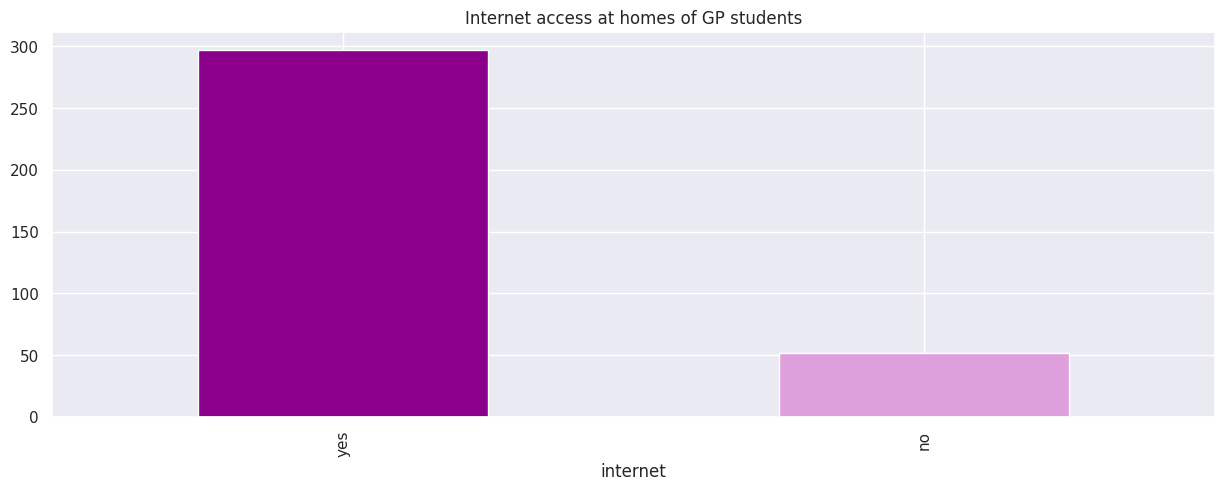

In [47]:
gp_df['internet'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Internet access at homes of GP students') 

Text(0.5, 1.0, 'Internet access at homes of MS students')

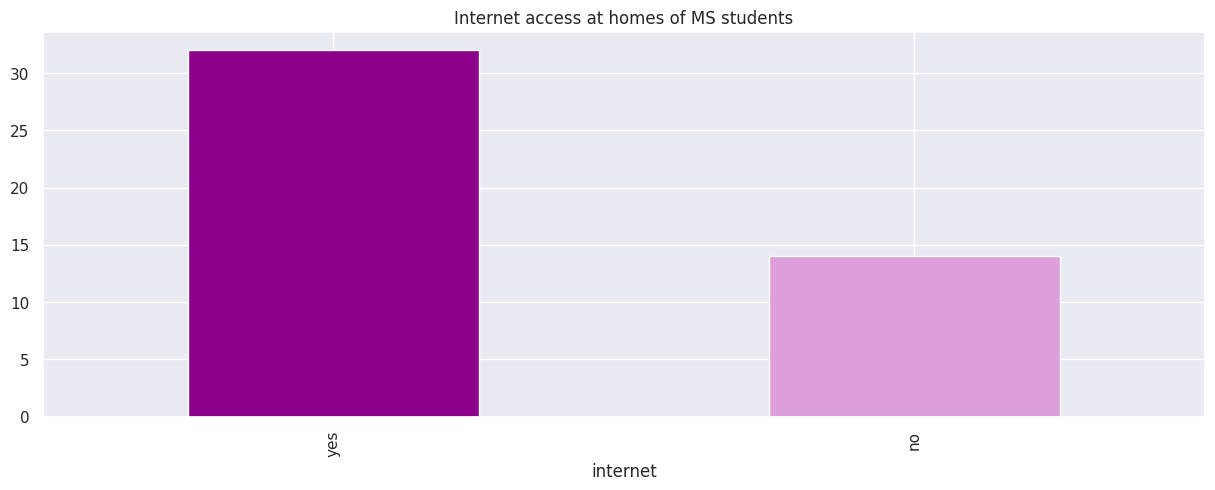

In [48]:
ms_df['internet'].value_counts().plot(kind='bar',figsize=[15,5], color=['darkmagenta','plum'])
plt.title('Internet access at homes of MS students') 

We can see that a far higher proportion of GP students have internet access than MS students, if we use this as a wealth indicator we could say that GP students tend to be wealthier and that may explain why they get higher maths marks (because they have access to more resources).

## Which factors (variables) are correlated with each other?

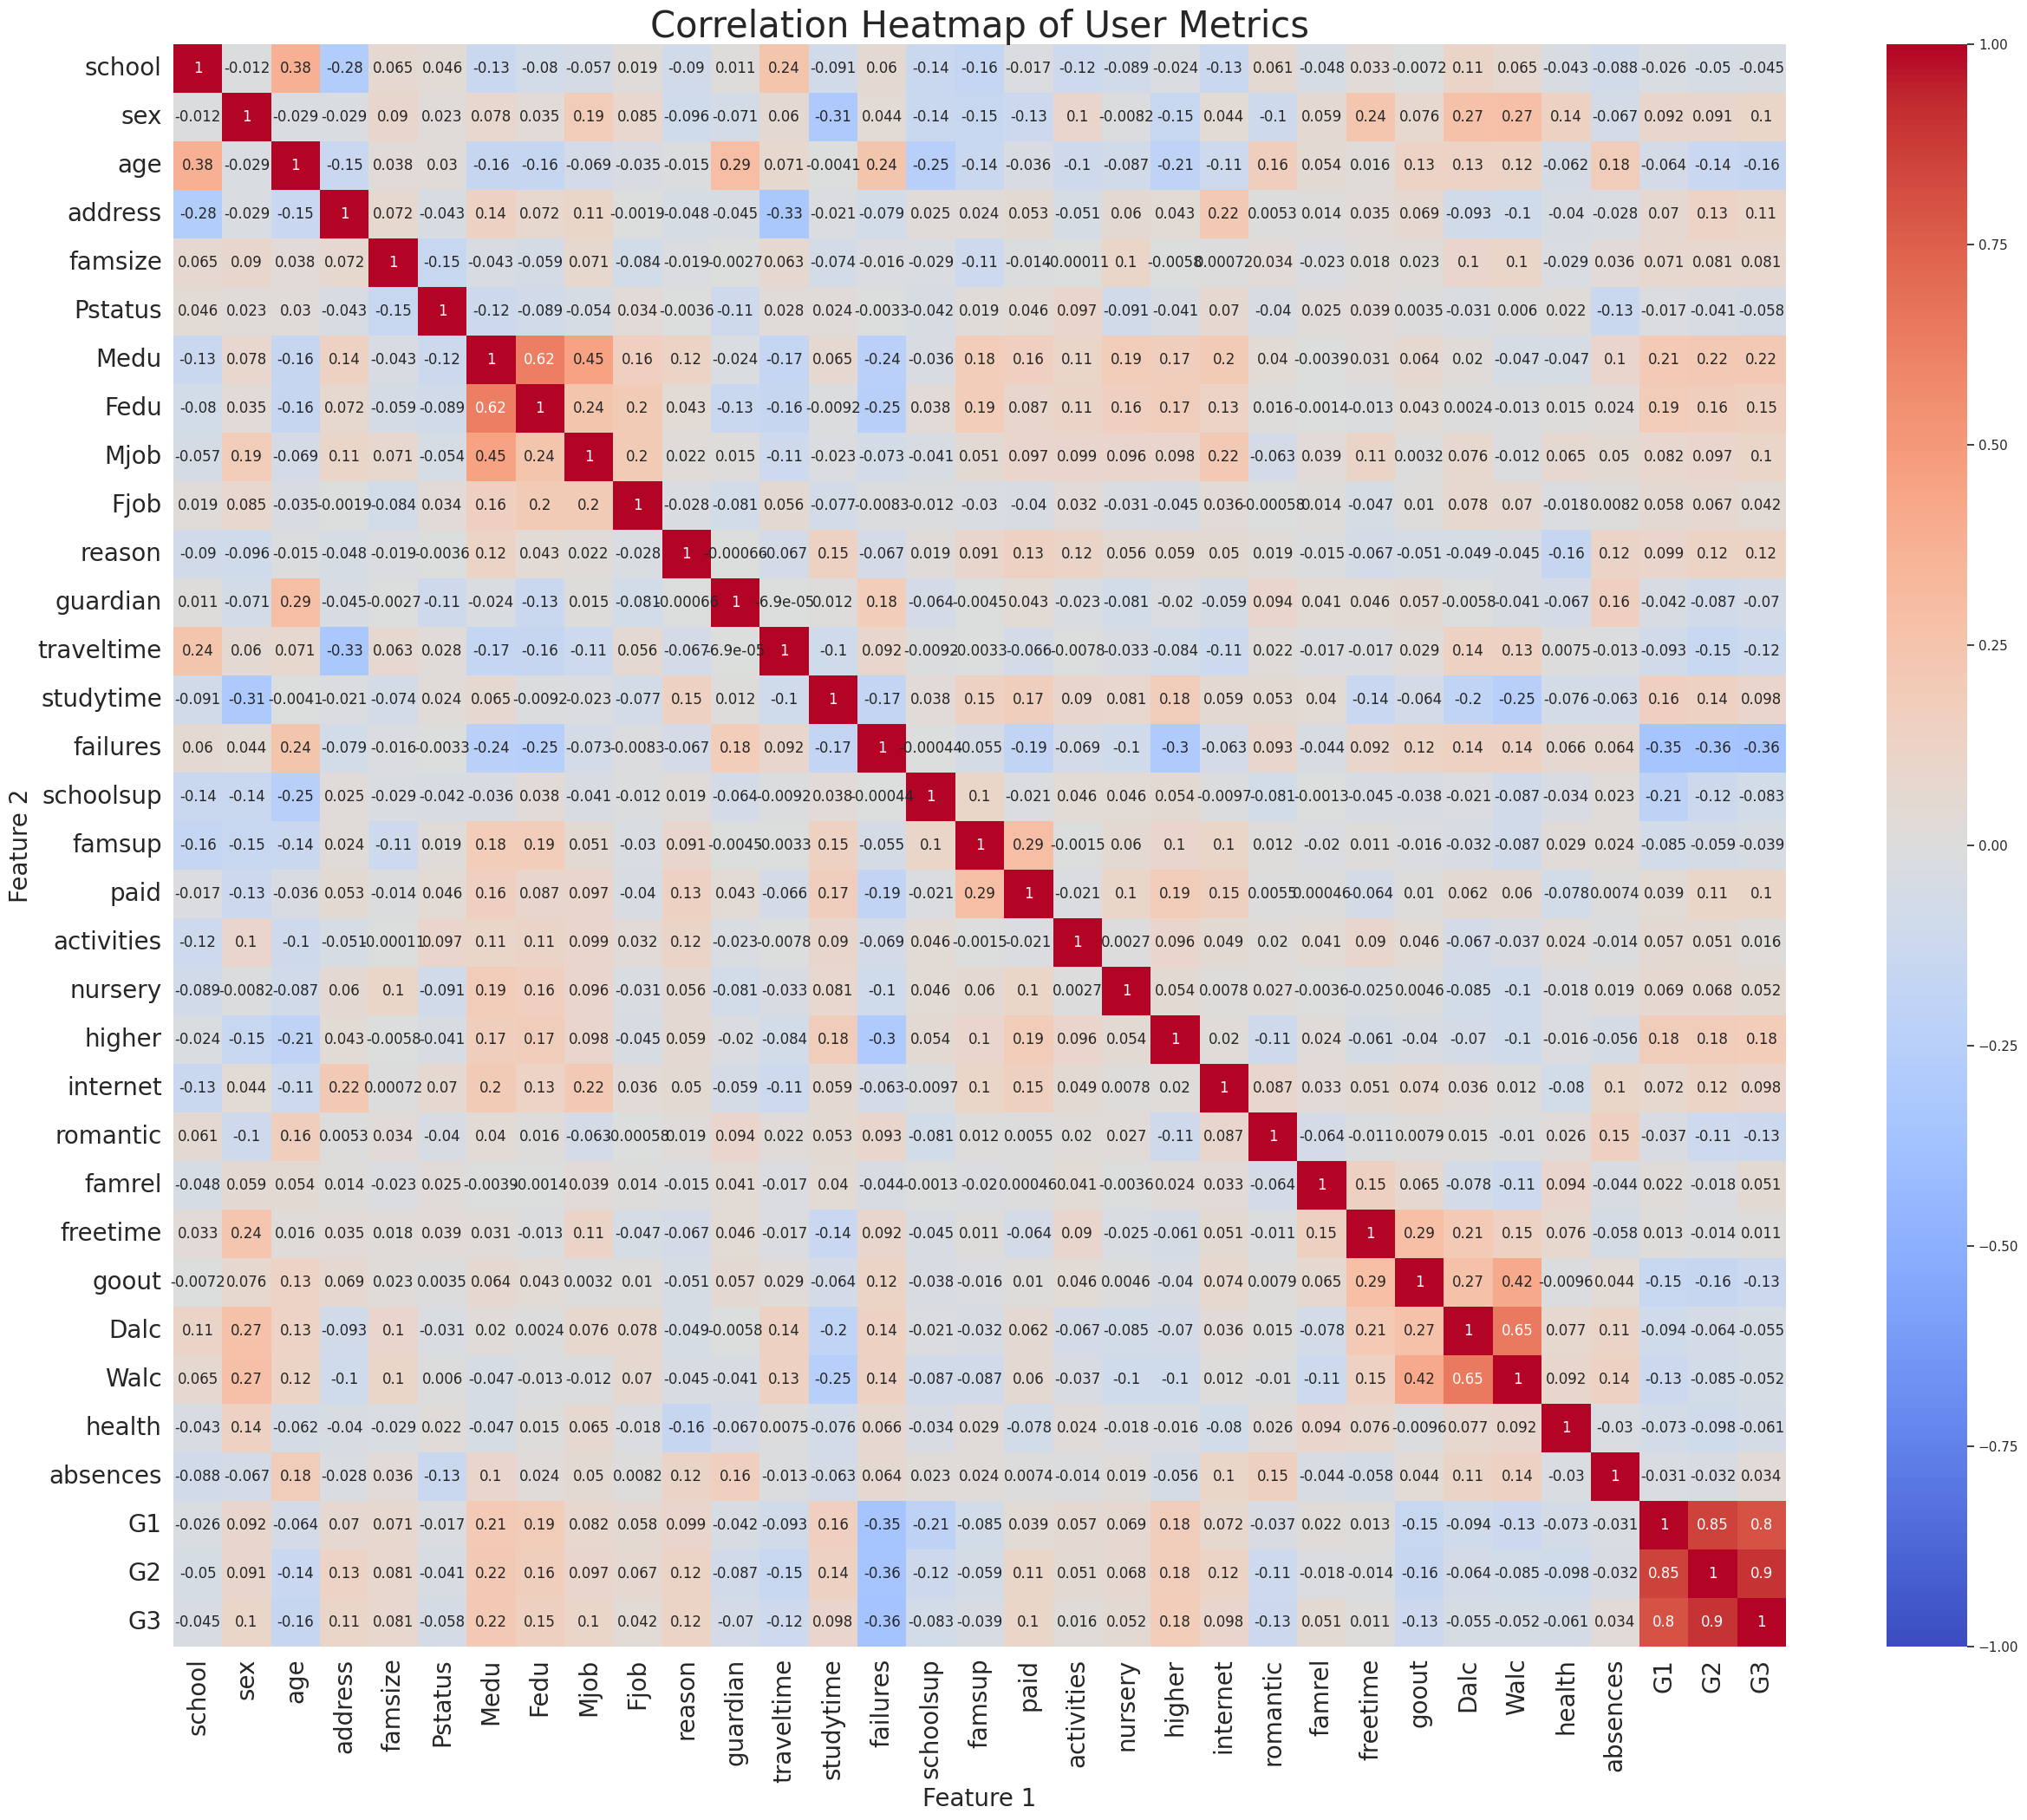

In [49]:
correlation_matrix = corr_df.corr(numeric_only=True)


# Create a heatmap of the correlation matrix
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap of User Metrics", fontsize=30)
plt.xlabel('Feature 1', fontsize=20)
plt.ylabel('Feature 2', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

How this correlation works is explained [here](https://www.scribbr.com/statistics/pearson-correlation-coefficient/).
We can see a strong correlation between:
- Weekend and weekday alcohol consumption
- First term grade (G1), second term grade (G2), and final grade (G3)
- The father's level of education and the mother's level of education

See if you can spot the other correlations.


# 5. Feature Engineering <a class="anchor"  id="feat"></a> 
## AKA Choosing Data
This is the part where you choose what features to include and whether to add more. A feature is something you are measuring in the data, normally represented by a column. 
More on feature engineering can be read [here](https://www.geeksforgeeks.org/what-is-feature-engineering/).

It involves four main parts:
- Feature creation (making new features from existing features)
- Feature transformation (changing the features into a different form)
- Feature extraction (reducing the number of features with fancy AI tools)
- Feature selection (choosing which features not to use)

### Feature Creation
I don't have any domain knowledge about student performance and can't think of any metrics that I can make based on the data. But for example if I had data about shipping box sizes, like 3 columns with the height and length and width of the boxes, I could make a 4th column with that multiplies those three columns to give the volume of the boxes.

### Feature Transformation
This involves changing the datatype (like we did earlier) or normalizing or scaling the data. This is a very important step to help the machine learning model. For more details read [here.](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)


Normalizing or scaling takes numbers with very different ranges and brings them in the same range. So if one column is between 0 and 20,000 and the other column is between 1 and 5 it will make them both between -1 and 1. This is so the machine learning model does not get distracted by the bigger numbers and treats all the values equally.
Below shows the difference normalizing or scaling can make:


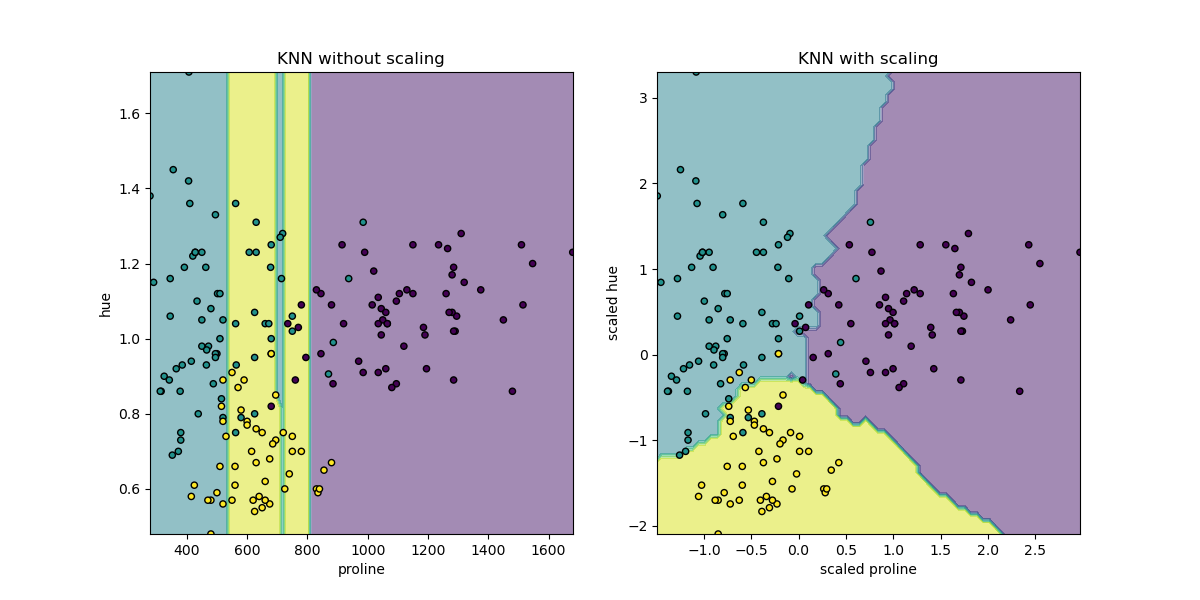

We will scale the data just before we create the model. But [here](https://www.kaggle.com/code/aimack/complete-guide-to-feature-scaling) is a guide for how to do scaling and normalization.

### Feature Extraction
This could be a talk in and of itself, so for brevity I will leave some details [here](https://www.youtube.com/watch?v=8klqIM9UvAc) about how to do Principal Component Analysis. Essentially, this is a really fancy way to take many features and have AI choose a few of them. We won't be doing that as it is just repeating the next step.

### Feature Selection
This is where we use some rules to choose features. Often we have to test different rules until we find the most effective ones. We are going to use the rule 'if a feature influences student's grades enough, we will choose it'.

We first check for influence by looking at correlation.

In [50]:
G3_corr = correlation_matrix[['G3']] # Only getting the correlation of the final grades
G3_corr = pd.DataFrame(data=G3_corr) # Making it into a dataframe
G3_corr = G3_corr.reset_index().rename(columns={"index":"factor"}) # Reorganising the index
G3_corr = G3_corr.rename(columns={"G3":"correlation"})  # Renaming the column G3 to correlation so it's not confusing
G3_corr.head() # Show the first 5 entries

factor  correlation
0   school    -0.045017
1      sex     0.103456
2      age    -0.161579
3  address     0.105756
4  famsize     0.081407

After much testing, I found that a correlation of >0.15 and <-0.15 was the best, so we will plot which features those are for fun. 

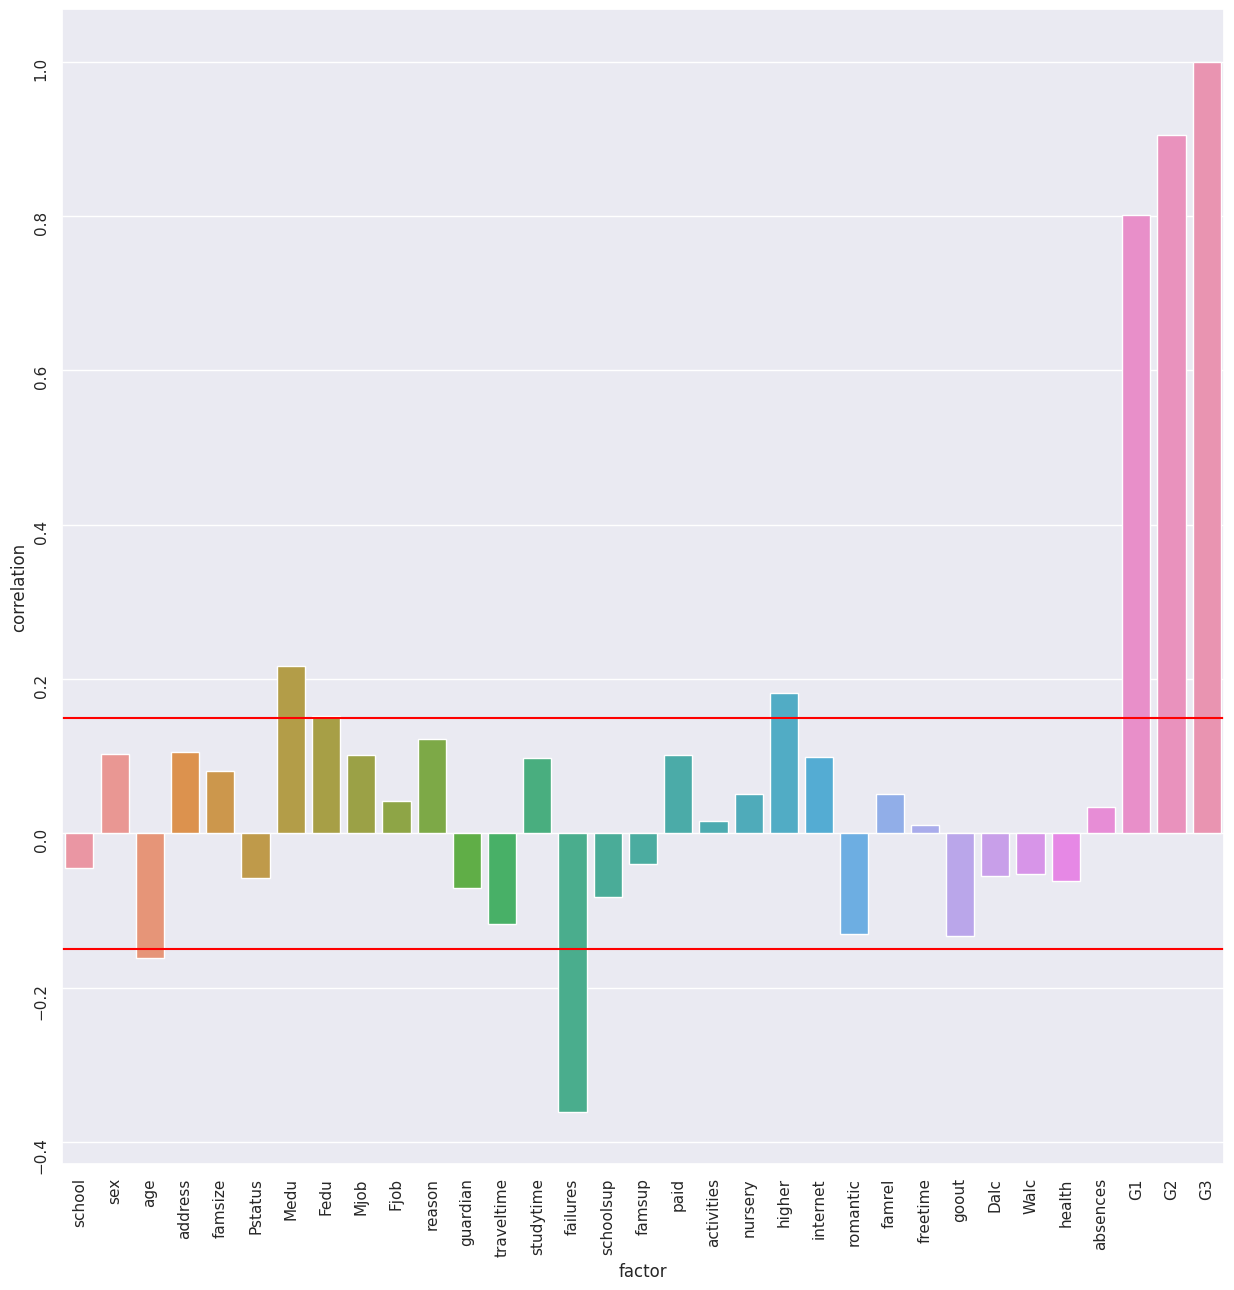

In [51]:
sns.barplot(data=G3_corr, x='factor', y='correlation') # Create a barplot of the factors influencing students' grades
plt.tick_params(labelrotation=90) # Rotate the labels 90 degrees
plt.axhline(y=0.15, color="red") # Create a line at 0.15 correlation
plt.axhline(y=-0.15, color="red") # Create a line at -0.15 correlation

Now we can see only a few features lie outside of that range (remember: smaller number = less influence (correlation) so we want the larger numbers AKA the ones outside of the red lines)

The features we want are age, Medu, failures, and higher. We are excluding G1 and G2 because those are kind of cheating since they are the previous marks.

In [52]:
# If the correlation with G3 is less than 0.15, drop it
df_select_1=G3_corr[G3_corr['correlation']>=0.15] # Create a dataframe with all the values above 0.15
df_select_2=G3_corr[G3_corr['correlation']<=-0.15] # Create another dataframe with all the values below -0.15
concat = pd.concat([df_select_1,df_select_2]) # Combine the two dataframes
concat # check the dataframe

factor  correlation
6       Medu     0.217147
7       Fedu     0.152457
20    higher     0.182465
30        G1     0.801468
31        G2     0.904868
32        G3     1.000000
2        age    -0.161579
14  failures    -0.360415

In [53]:
# Copy the df
df_copy = df.copy()
# Convert the columns to the right type
df_copy['Medu'] = df_copy['Medu'].astype("object")
df_copy['Fedu'] = df_copy['Fedu'].astype("object")
df_copy['G3'] = df_copy['G3'].astype("object")
# Create the df with the selected columns
col_names = [col for col in df_copy.columns if col in concat.factor.to_list()]
df_copy_1 = df_copy.loc[:, col_names]
df_copy_1.head()

age Medu Fedu  failures higher  G1  G2  G3
0   18    4    4         0    yes   5   6   6
1   17    1    1         0    yes   5   5   6
2   15    1    1         3    yes   7   8  10
3   15    4    2         0    yes  15  14  15
4   16    3    3         0    yes   6  10  10

In [54]:
# No cheating with the model! We drop the previous grades
df_copy_1 = df_copy_1.drop(['G1','G2'],axis=1)

# 6. Machine Learning <a class="anchor"  id="ml"></a> 
## AKA ooo pretty pretty shiny shiny AI stuff

What is Machine Learning?

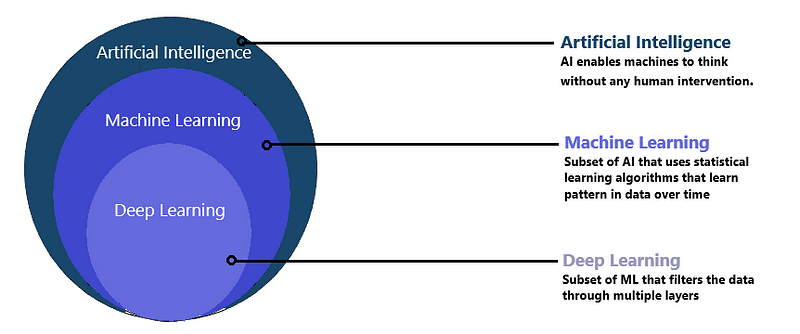

AI is code that lets a computer think and do tasks without a human helping it. Machine Learning is a type of AI, so all Machine Learning is AI but not all AI is Machine Learning. For interest's sake, here are some other types of AI:

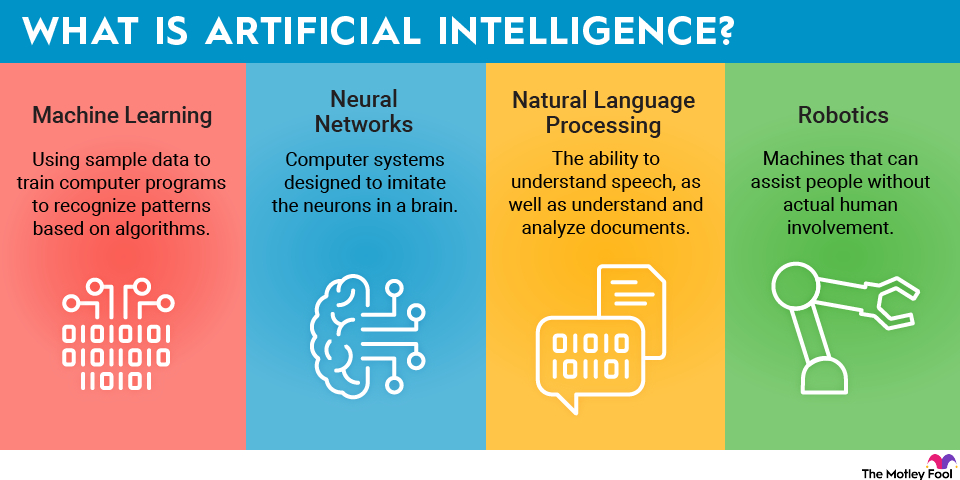

A Machine Learning model is a computer program that find patterns based on rules and maths using data. The general process for creating a Machine Learning model is as follows:

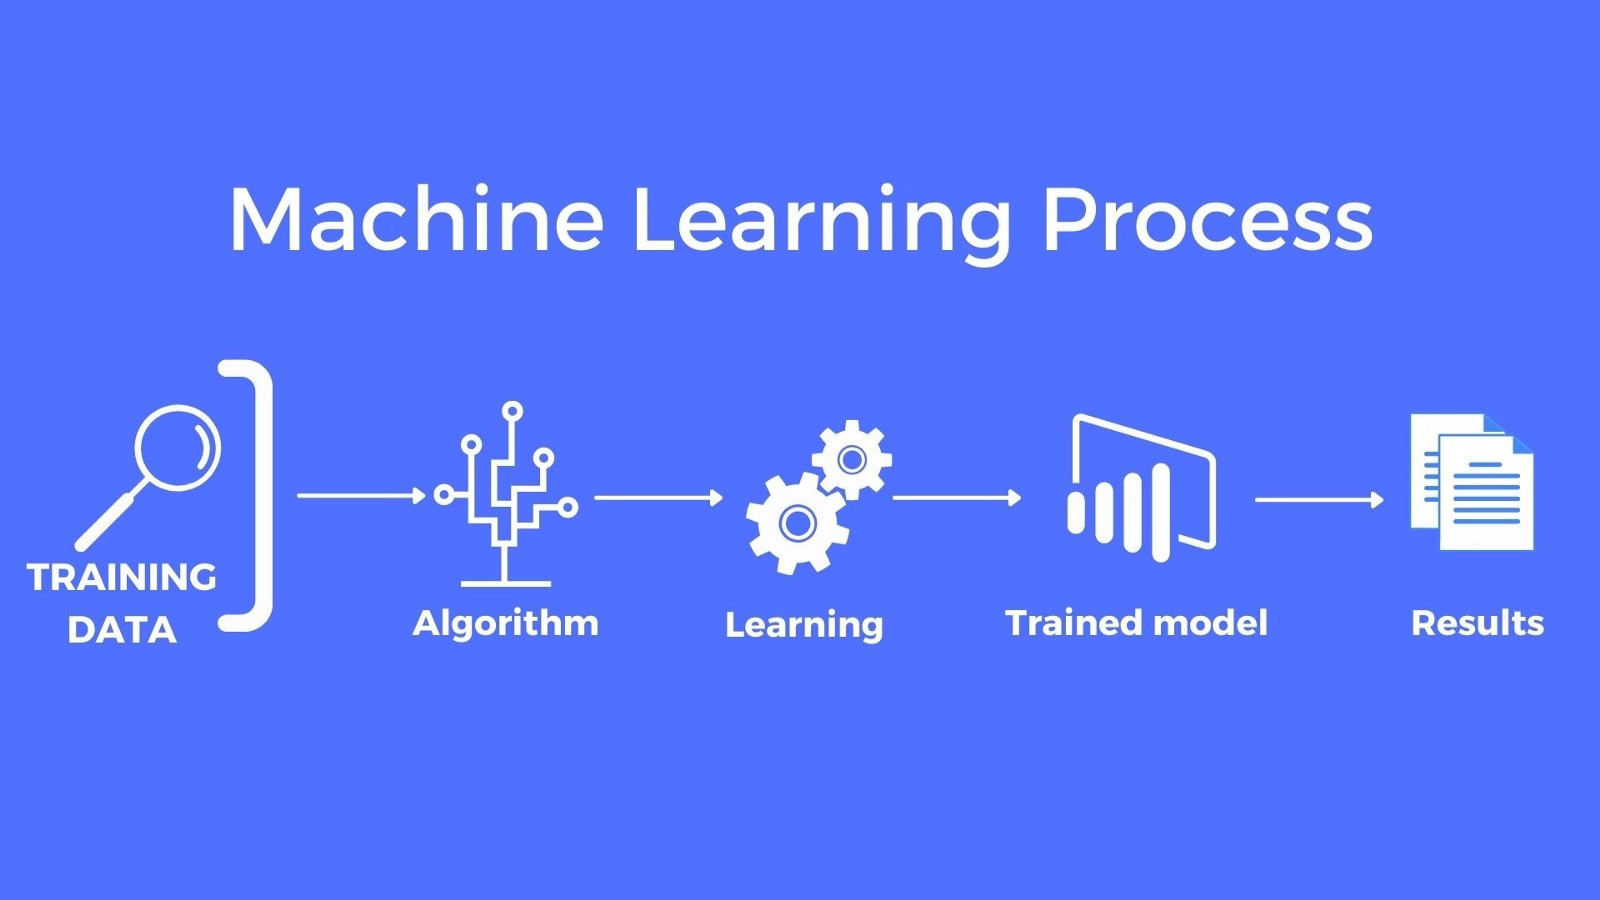

There are different types of Machine Learning:

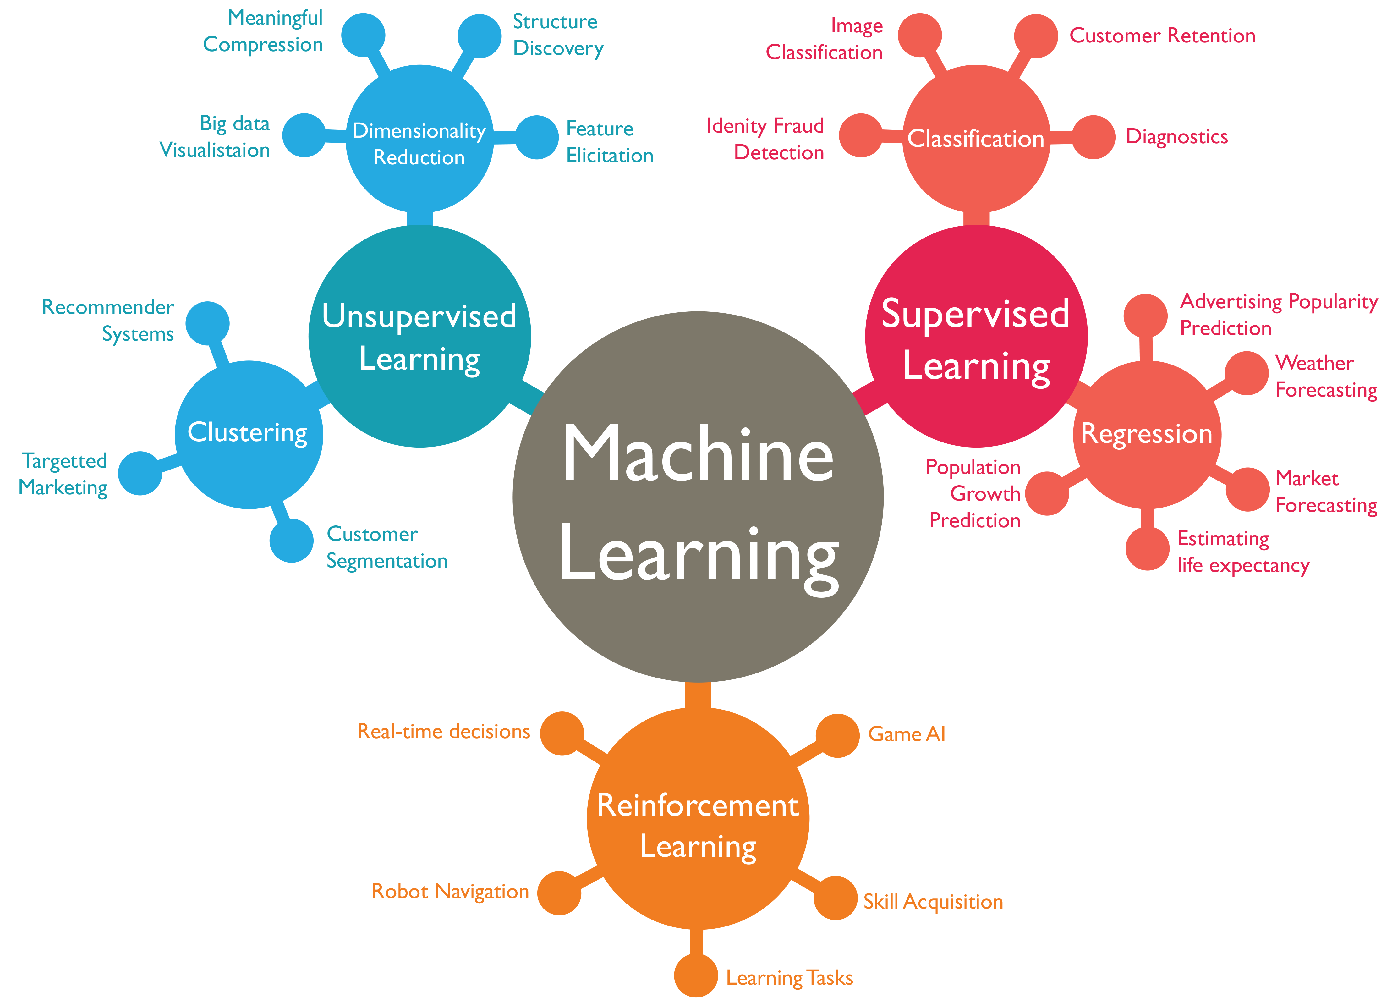

The three main ones are:

    1. Supervised Learning
    
    2. Unsupervised Learning
    
    3. Reinforcement Learning

Supervised learning is like how we learn as children - it involves data that is labelled (ie has the answers attached). It is like if we are shown an apple and told that is called an apple. So if someone asks us what this round, red fruit is, we can identify that it is an apple because we have seen it before.

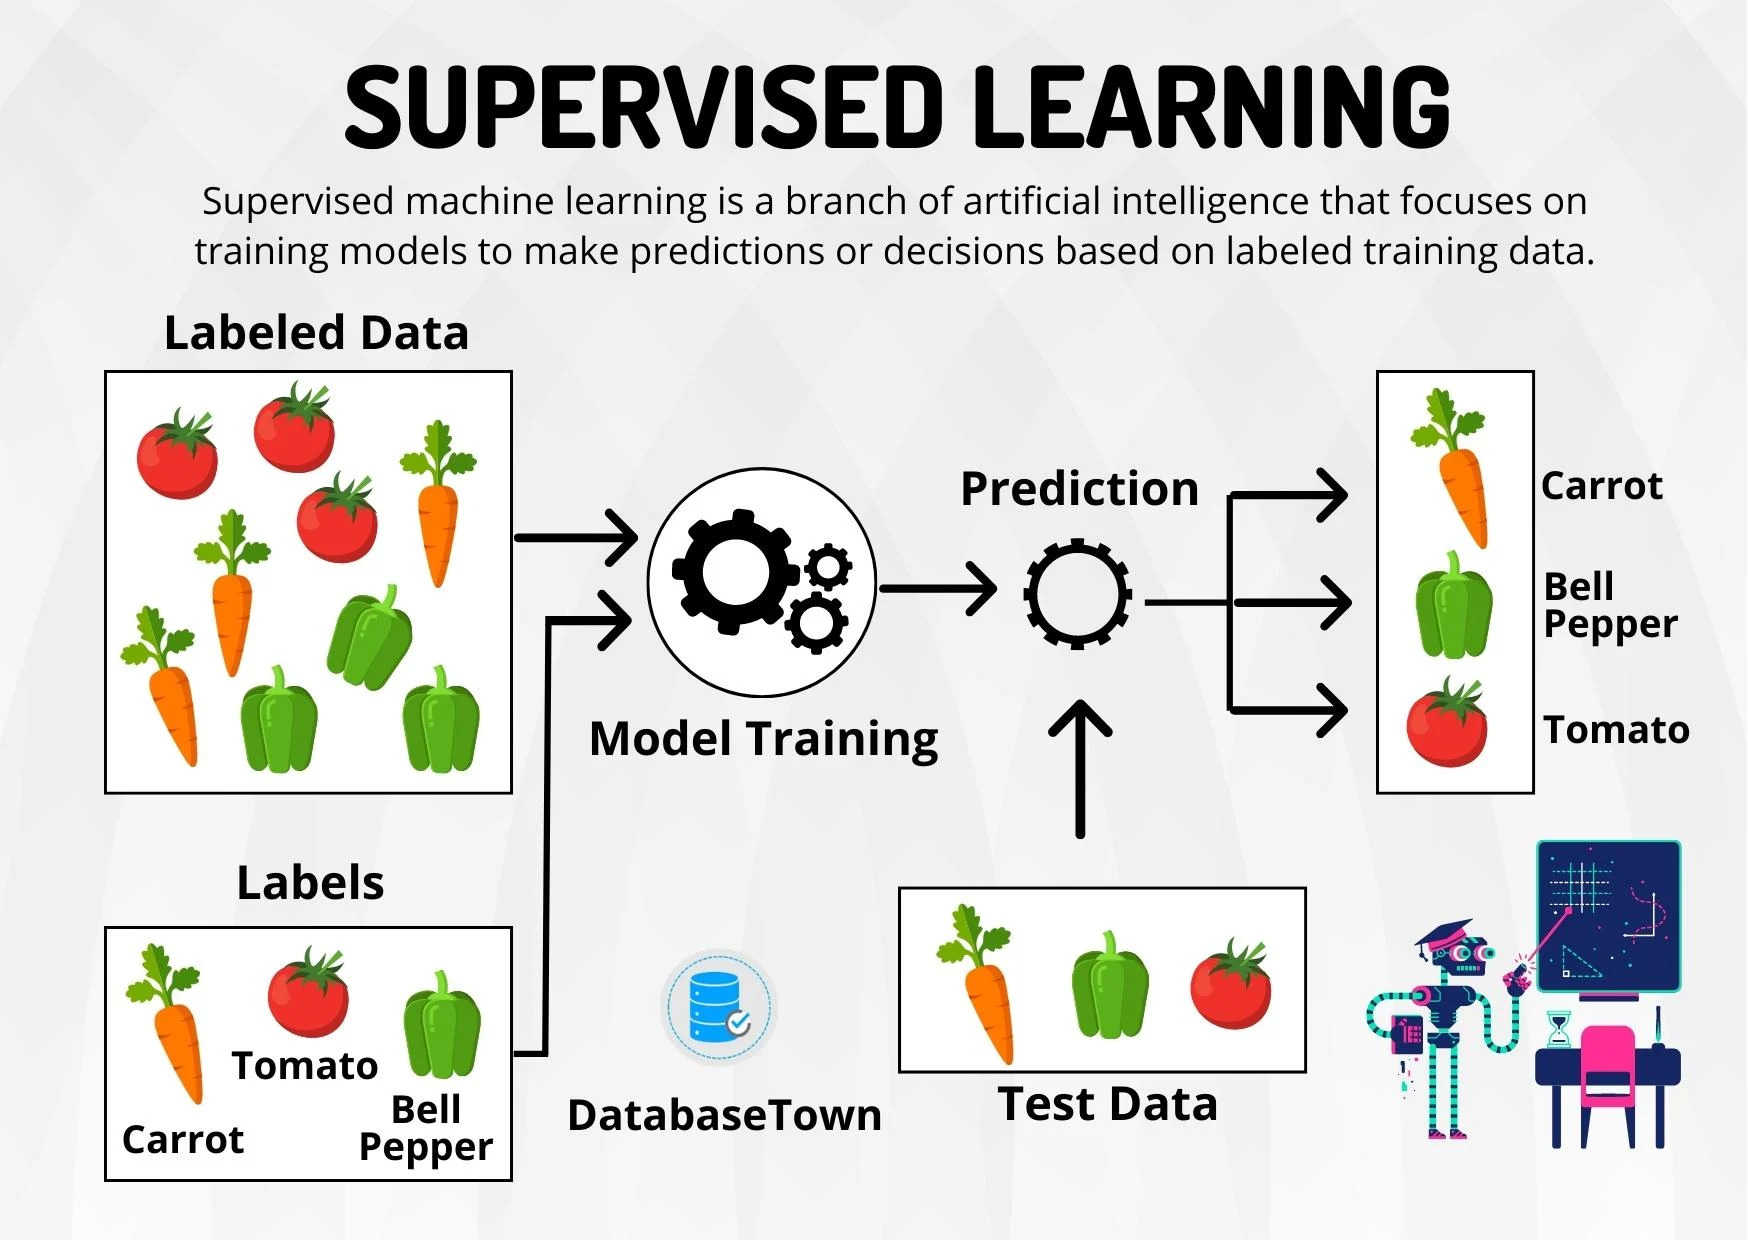

Unsupervised learning is when the model doesn't have labelled data (it has no answers attached). The model will try to group the data together based on similarities it finds.

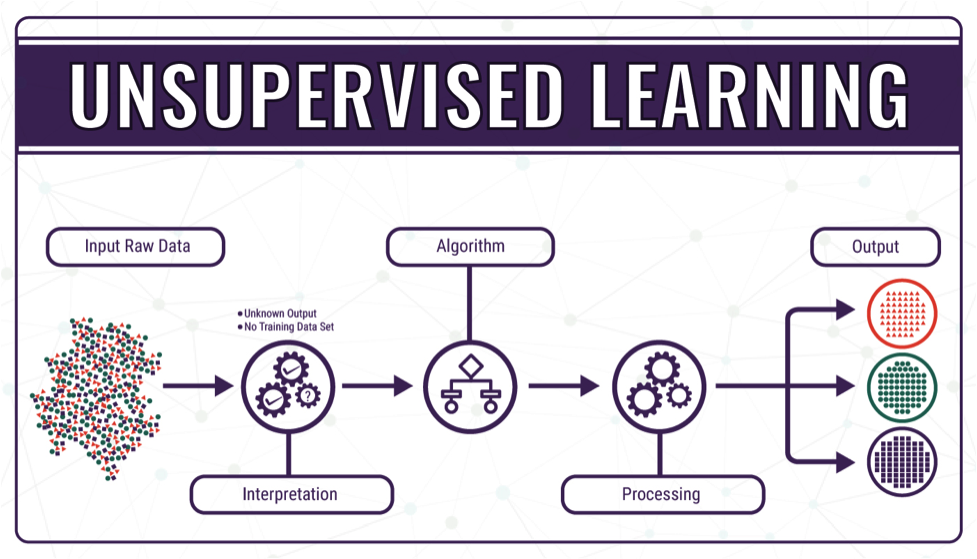

Reinforcement learning is where certain values are attached to each action in an environment. Some actions will be rewarded and some will be punished based on outcomes. [Here](https://www.youtube.com/watch?v=L_4BPjLBF4E) is reinforcement learning in action, but be warned, it is wildly entertaining and you can go down an endless rabbit hole.

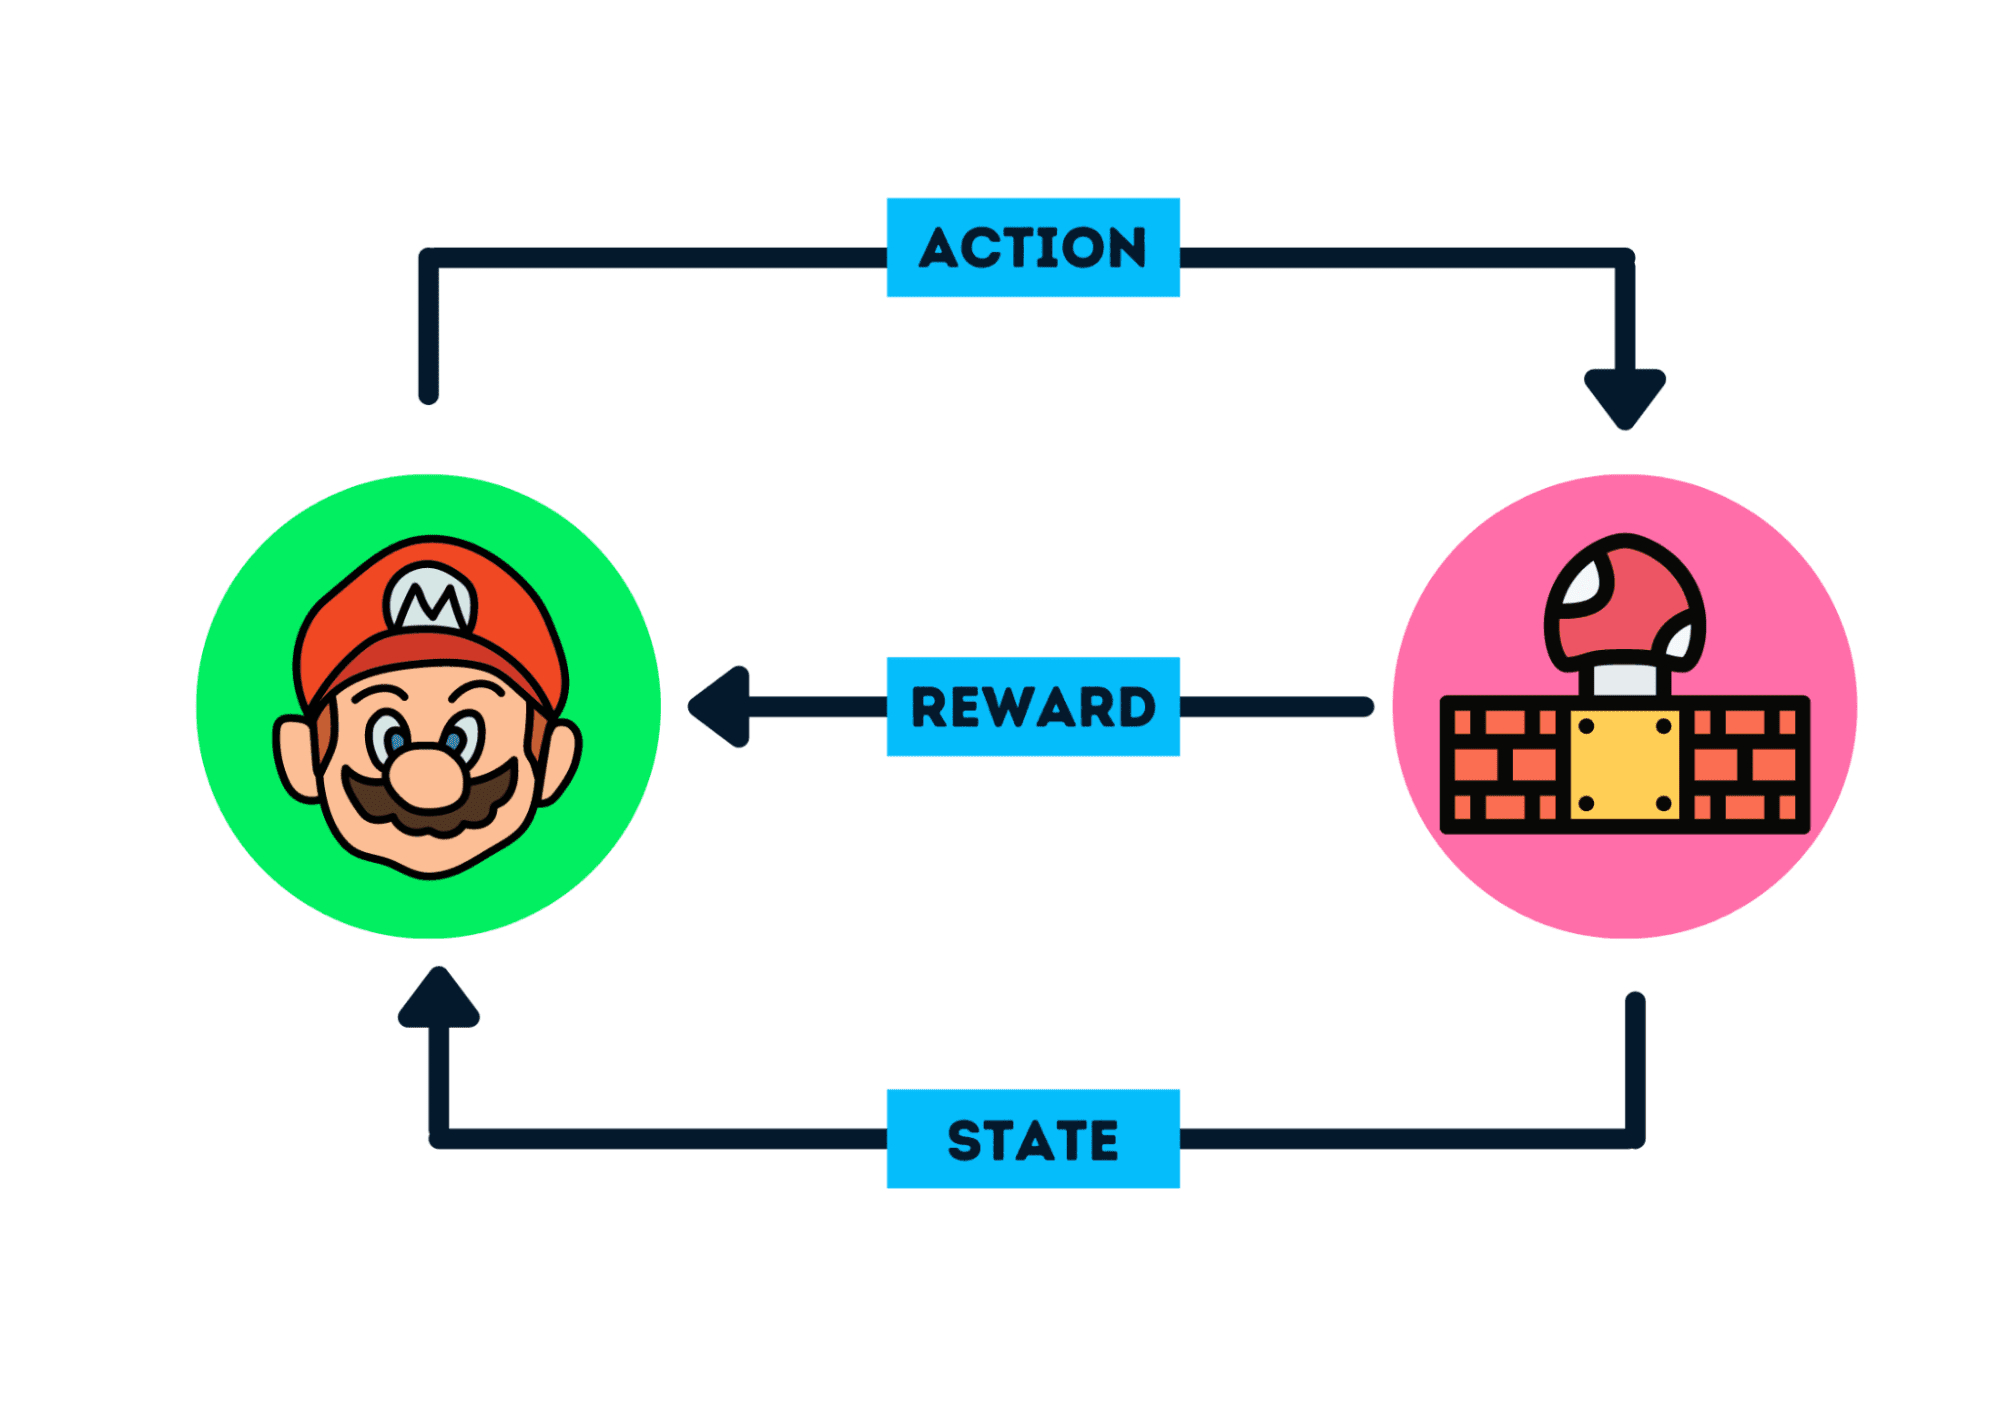

Let's make a Machine Learning model now that we understand it. We will make a type of supervised learning model. First, we need to prepare the training data. This involves splitting the X and y. X is the input, or what data we put in the model. y is the output we try to predict. In an unsupervised learning model there would be no y.


In [55]:
y = df_copy_1['G3'] # What we want to predict (the final grades)
X = df_copy_1.drop('G3', axis=1) # What we use to predict it (all the other data)

In [56]:
# We need to process the data before we can use it, such as scaling and changing data types
# Here we use a pipeline to streamline the process
numeric_features = ['age', 'Medu','Fedu','failures']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())]) # ***Scaling the data that we mentioned earlier!

categorical_features = ['higher']
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Changing the categorical data into numerical data

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X = preprocessor.fit_transform(X) # Putting X through the pipeline

In [57]:
print(X) # Checking everything was successful

[[ 1.02304645  1.14385567  1.36037064 -0.44994364  0.          1.        ]
 [ 0.23837976 -1.60000865 -1.39997047 -0.44994364  0.          1.        ]
 [-1.33095364 -1.60000865 -1.39997047  3.58932316  0.          1.        ]
 ...
 [ 3.37704655 -1.60000865 -1.39997047  3.58932316  0.          1.        ]
 [ 1.02304645  0.22923423 -0.47985677 -0.44994364  0.          1.        ]
 [ 1.80771315 -1.60000865 -1.39997047 -0.44994364  0.          1.        ]]


Now we need to separate some of the data so that later we can test the model without it being able to cheat on the test because it has seen the answers.

In [58]:
# Separating X and y into a training and test set, with 10% of the data set aside for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=52
)


Now we can do the really fun stuff, choosing the model. For this demo, I have chosen a linear regression model because it is really simple to understand and won't take ages to run. If you remember straight line graphs from high school, then you know how this works. Two (or more) variables are plotted on a graph and a line is found that best fits the data. To predict a value, the line's coordinates are used. This line is the model. 

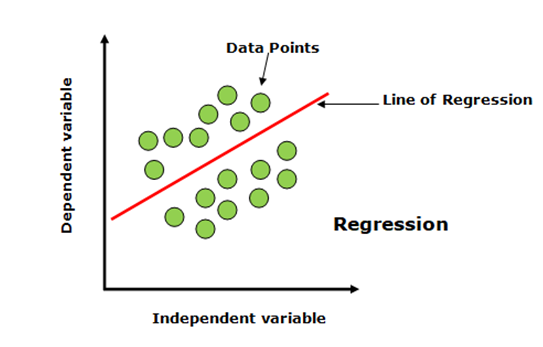

In [59]:
# Create linear regression model
regr = LinearRegression()

Now that we have chosen a model/algorithm, we must train it.

In [60]:
# Train the model using the training data sets
regr.fit(X_train, y_train)


LinearRegression()

After training it, we have to check its performance. 

# 7. Model Evaluation <a class="anchor"  id="eval"></a> 
## AKA the stats part

This part gets a bit mathsy, but please don't overlook it because this is how we decide if the thing we created has any value in the real world.

In [61]:
# Get the model to predict what the test scores will be, so we can see what sorts of values it is predicting 
# This is also how the model would be used to predict any other value
regr.predict(X_test)

array([11.73335906, 11.29146004,  6.05999955, 11.3096463 ,  5.77575902,
       12.18884395, 11.48743037,  2.03260222,  9.97036337, 11.29146004,
       11.71517281, 11.94291525, 11.3096463 , 10.64000483, 11.75154532,
       10.64000483, 10.86774728, 11.53738874, 12.18884395,  9.97036337,
       10.21629207, 11.04553135, 10.86774728, 10.16633369, 11.50561662,
        9.98854962, 10.14814744,  9.34307107, 10.88593353, 11.50561662,
       10.62641897, 11.29146004, 11.0637176 , 10.62181858,  8.9193583 ,
       12.2070302 , 11.96110151, 11.71517281, 11.48743037,  6.95738346])

In [62]:
# Returns the coefficient of determination
regr.score(X_test, y_test)

0.12539937097621146

The coefficient of determination is 1 - u/v where u is the residual sum of squares and v is the total sum of squares. 

RSS (residual sum of squares) is the sum of the squares of the difference between the points and the prediction of the model.

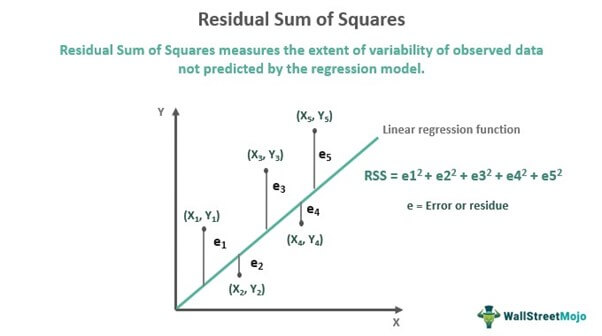

Total sum of squares is the sum of the square of the distance between the mean (average) of all the y points and the actual value of the y points.

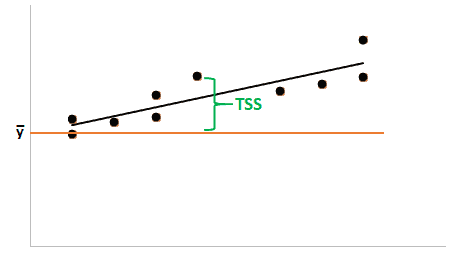

So the coefficient of determination is 1 - RSS/TSS, meaning the most accurate model would be 1. So the closer to 1 a model is, the better. (This is just a general rule of thumb, a number that is too high should make you suspicious of overfitting). Read about overfitting [here](https://aws.amazon.com/what-is/overfitting/#:~:text=Overfitting%20occurs%20when%20the%20model,all%20possible%20input%20data%20values.)

Our coefficient of determination was 0.13, so this is not a great model.

Next we'll use mean square error (MSE) to evaluate the model.


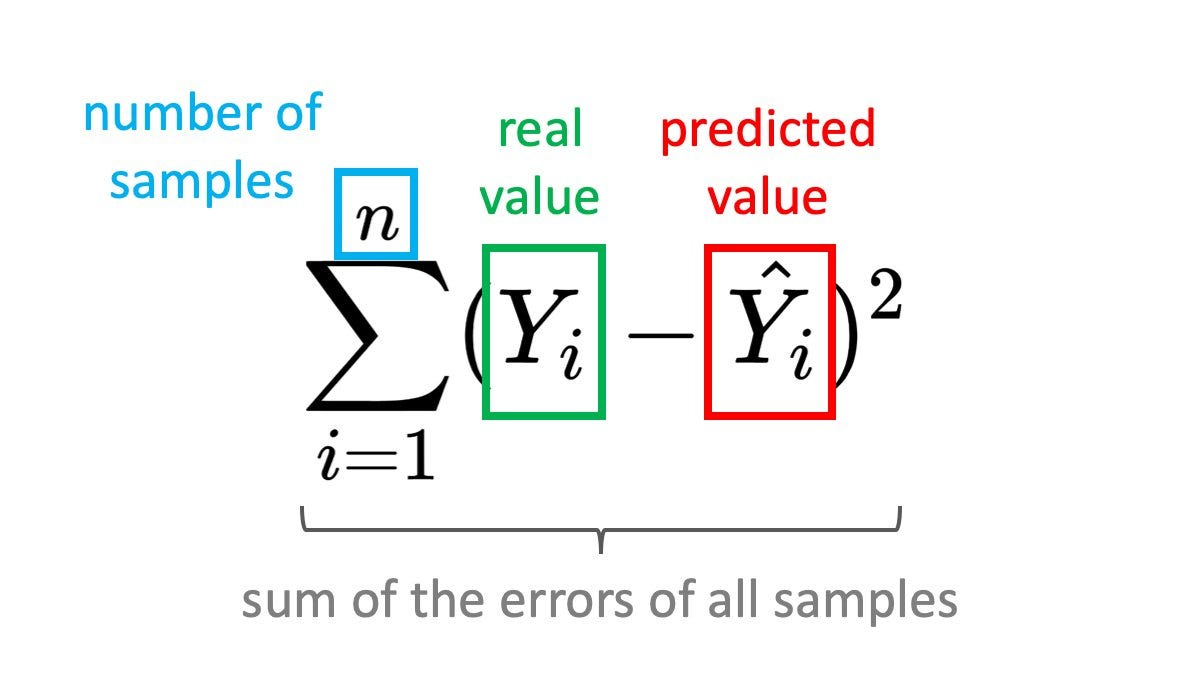

MSE is the sum of all the squares of the difference between our prediction and the real value. The lower this number is the better.

In [63]:
mse = mean_squared_error(y_test, regr.predict(X_test)) # Get the MSE
print("The mean squared error (MSE) on test set: {:.4f}".format(mse)) # Print the MSE

The mean squared error (MSE) on test set: 10.7926


Our MSE is 10.8 square grade points. Since we don't measure grades in square units, we will calculate the RMSE (Root Mean Square Error) to get a more understandable value

In [64]:
rmse = np.sqrt(mse) # Get the RMSE be rooting the MSE
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse)) # Print the RMSE

The root mean squared error (RMSE) on test set: 3.2852


Our RMSE is 3.29 grade points out of 20, that means *on average* that's how inaccurate our model is. That's not too shabby for a simple line graph. But the previous evaluation gave us reason to believe this isn't a great model.

Now if we were happy with the performance of our model, it would be time to ship it out to the real world for use, because it can't just sit on my computer.

# 8. Deployment <a class="anchor"  id="deploy"></a> 
## AKA where it all falls apart

This is where you package the model to be used by other people and to make it more user-friendly. Let's go back to our use-case of a school district trying to predict whether a student is at risk of failing or not. These users are not Data Scientists, they aren't going to borrow your laptop, open up Kaggle and start coding in Python, so we need to make a nice website app for them.

To achieve this, we need to do something called *pickling*. This is where you store a model or even a pipeline for later use. Think of it like pickling a vegetable, it makes it more portable, more compact, and longer. These files end in .pkl.

## "Pickle" the model

We need to pickle our model and pipeline because the pipeline changed the values we used, so the model on recognises those values. If you gave it the 1-5 that many of the variables had, it would give you an error because it expects only values between 0 and 1.

In [65]:
model_save_path = "lr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(regr,file) # Pickling the model

In [66]:
model_save_path = "encoder.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(preprocessor,file) # Pickling the pipeline

You can find and download these files (after running the notebook) on the righthand-side under the 'Notebook' column in the output section under the /kaggle/working folder.

## Investigate variables

So that we can design our app properly, we need to know what the possible options are for each variable so that we know what options to include in our app.

In [67]:
# Here we are making a mini-df with just the values we care about
# Copy the df
df_var = df.copy()
# Convert the columns to the right type
df_var['Medu'] = df_var['Medu'].astype("object")
df_var['Fedu'] = df_var['Fedu'].astype("object")
df_var['G3'] = df_var['G3'].astype("object")
# Create the df with the selected columns
col_names = [col for col in df_var.columns if col in concat.factor.to_list()]
df_var = df_var.loc[:, col_names]
df_var.head()

age Medu Fedu  failures higher  G1  G2  G3
0   18    4    4         0    yes   5   6   6
1   17    1    1         0    yes   5   5   6
2   15    1    1         3    yes   7   8  10
3   15    4    2         0    yes  15  14  15
4   16    3    3         0    yes   6  10  10

In [68]:
df_var.Medu.unique() # Checking what all the possible values are

array([4, 1, 3, 2, 0], dtype=object)

In [69]:
df_var.Fedu.unique() # Checking what all the possible values are

array([4, 1, 2, 3, 0], dtype=object)

In [70]:
df_var.age.unique() # Checking what all the possible values are

array([18, 17, 15, 16, 19, 22, 20, 21])

In [71]:
df_var.failures.unique() # Checking what all the possible values are

array([0, 3, 2, 1])

In [72]:
df_var.higher.unique() # Checking what all the possible values are

array(['yes', 'no'], dtype=object)

Because I don't have time to make an actual HTML website, I will use Streamlit. [Here's](https://docs.streamlit.io/get-started/tutorials/create-an-app) how to use Streamlit if you want to create a quick Python web app. 

Now we can make an app right?

Wrong, everything fell apart, even though it was working fine on Kaggle.

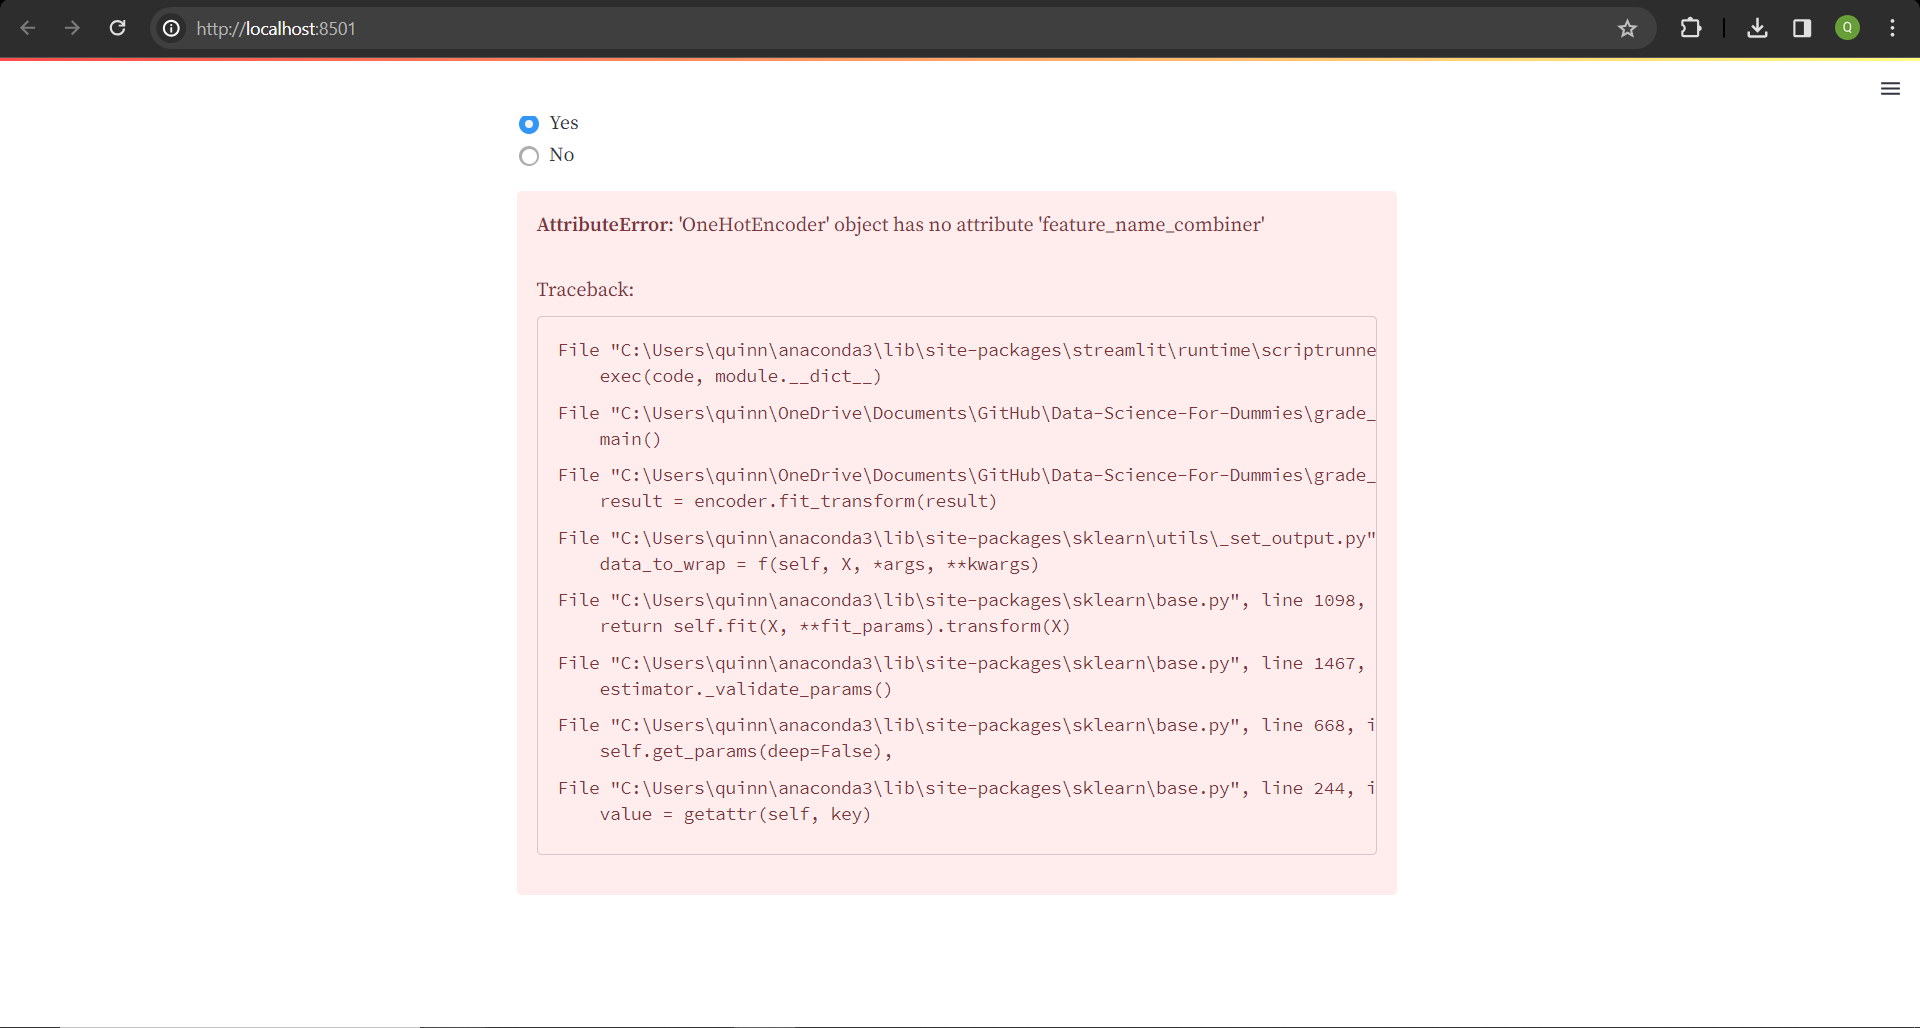

Long story short, not even StackOverflow knew what was up and it turned out to be an issue with the versions of the libraries I was using in Kaggle vs in the deployment.

This next code block checks the versions of all the libraries. I needed to update Scikit-learn on Kaggle for my app to work.

In [73]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system names
        if name == "PIL":
            name = "Pillow"
        elif name == "sklearn":
            name = "scikit-learn"

        yield name
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

/tmp/ipykernel_34/758457530.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


matplotlib==3.7.4
numpy==1.24.4
pandas==2.1.4
scikit-learn==1.2.2
seaborn==0.12.2


If you run into similar errors, make sure to run the below code:

In [74]:
#pip install --upgrade scikit-learn

If you want to try the app out, scan this code and select the Grades Predictor link.

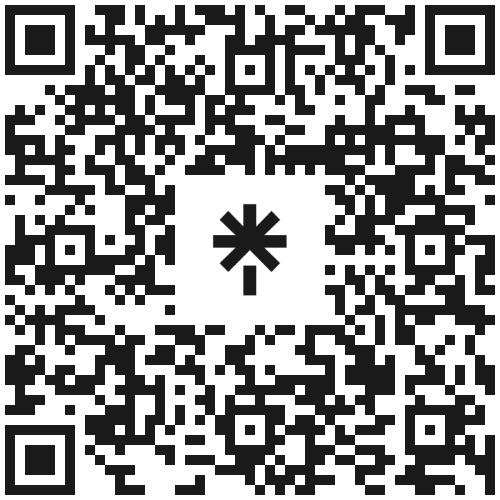

# That's *it*, that's how Data Science works
## I hope it's a little less intimidating now

# How You Can Start Picking Up Data Science Tools Now <a class="anchor"  id="tools"></a> 

Let's look at what Data Science is made up of:

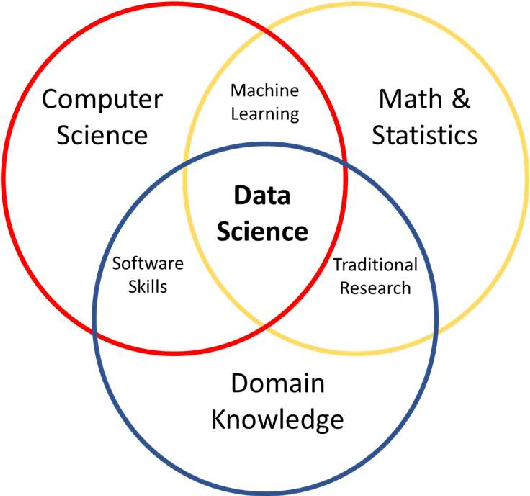

The domain knowledge is a really important one because people will come from all sorts of fields and say 'oh I have an Economics degree or I have a Civil Engineering degree, how will I possibly make the switch to Data Science?'. But there are so many jobs that require specific domain knowledge where those backgrounds give you an edge over every other Data Scientist. I don't even have a degree and I am hired as a Junior Data Scientist, so don't get too caught up in qualifications.

First, you'll need some coding under your belt for the computer science part: you can choose any tool that gets the job done really but the most common are Python and R. I would recommend Python because it's more commonly used and required on jobs, as well as a bit easier to learn. 


Try FreeCodeCamp on YouTube to learn [Python](https://www.youtube.com/watch?v=rfscVS0vtbw)


Then you'll want to learn some basic statistics.
For this I recommend StatQuest on YouTube. The playlists [statistics fundamentals](https://www.youtube.com/playlist?list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9) and [66 Days of Data](https://www.youtube.com/playlist?list=PLblh5JKOoLUJUNlfvCNhJMNjNNpt5ljcR) are good starting points
[Crash Course Statistics](https://www.youtube.com/playlist?list=PL8dPuuaLjXtNM_Y-bUAhblSAdWRnmBUcr) is also a good resource.


Domain knowledge comes with experience in certain fields or if you have a degree in a certain field. So, for example, if you really want to work in finance you should study up on the lingo and concepts in that field.

Once you have done these or are part-way through, the best things I can recommend are the following:
- Try the [#66DaysofData](https://www.66daysofdata.com/) challenge
- Go through this notebook and see if you understand it, especially read through the links I have added. Then try improve the model.
- Get your hands dirty with some challenges on Kaggle or the local alternative, Zindi - These are really fun and you can win money!

    - [Kaggle Beginner Tutorial](https://www.youtube.com/watch?v=mSusDGZhkVU)
    
    - [Getting Started With Zindi](https://zindi.africa/competitions/financial-inclusion-in-africa)
- Try a bootcamp 
     - [ExploreAI Academy](https://www.explore.ai/learn/academy) - I went here, it was awesome! (Full disclosure, I work for the parent company but I do not benefit in any way if anyone signs up, I just believe it is an amazing course)
     - [Umuzi](https://www.umuzi.org/data-sci)


If you want to try improve this model, [here](https://www.analyticsvidhya.com/blog/2015/12/improve-machine-learning-results/) is a good place to start.

If you want to know what to do to definitely improve the model, then click the dropdown below.

<details>
  <summary>Click for answer</summary>
  
  Upsample the data and use a Random Forest model
  
</details>

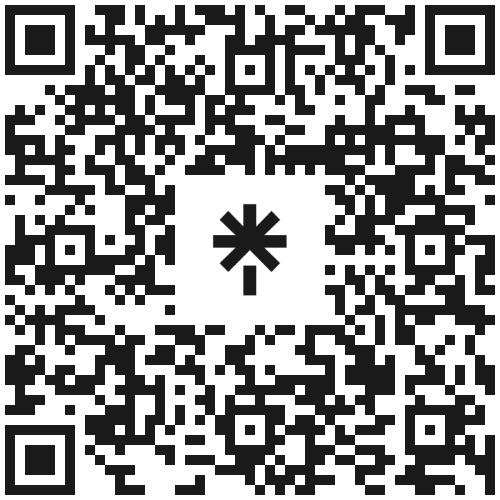